In [3]:
import numpy as np
import obspy
import emd
import pandas as pd
from tqdm.notebook import tqdm
import os
import scipy.signal as sg
from obspy.signal.trigger import recursive_sta_lta, classic_sta_lta
from concurrent.futures import ThreadPoolExecutor, as_completed
from matplotlib import pyplot as plt

C:\Users\alail\AppData\Local\Temp\ipykernel_30920\172008349.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(14, 3))


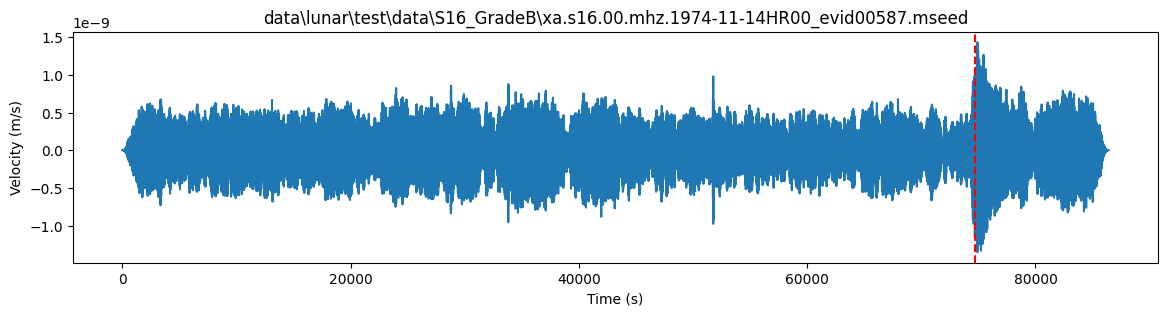

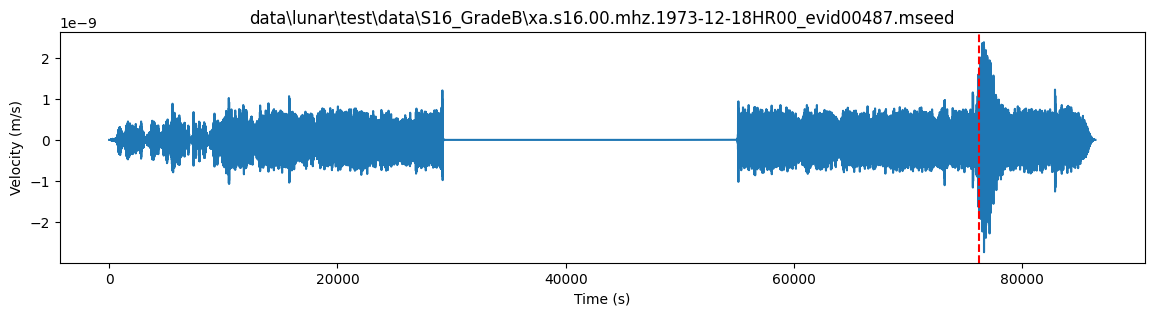

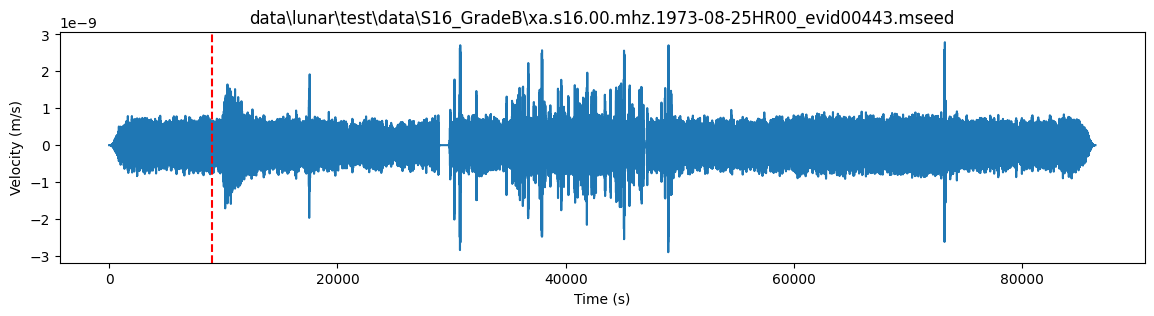

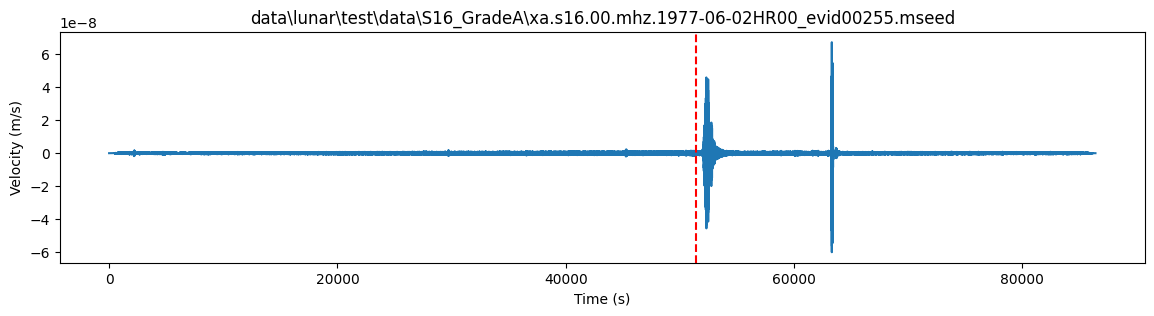

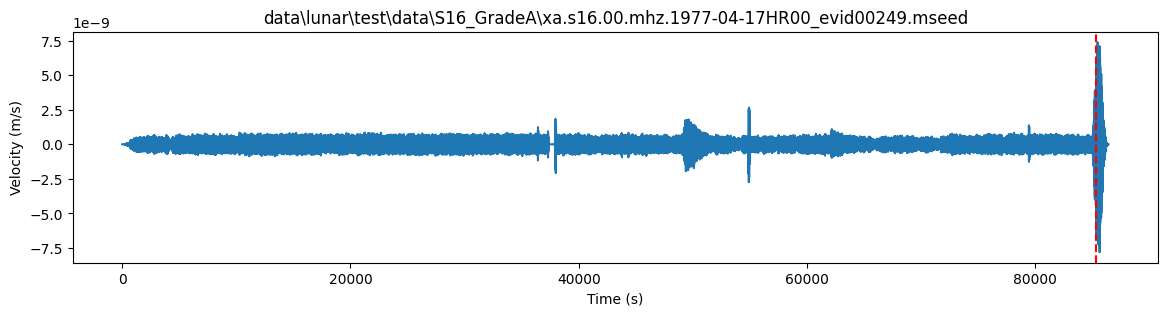

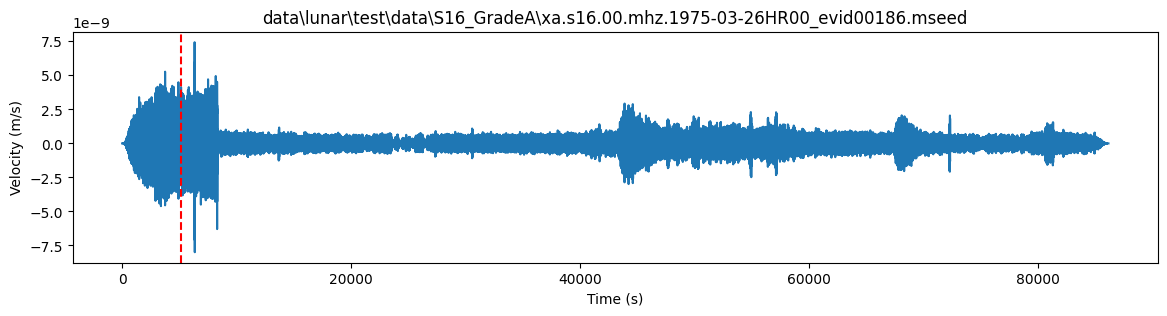

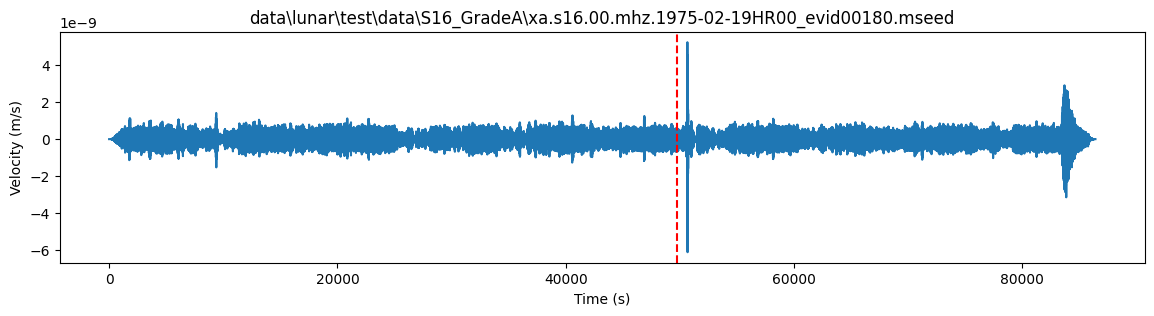

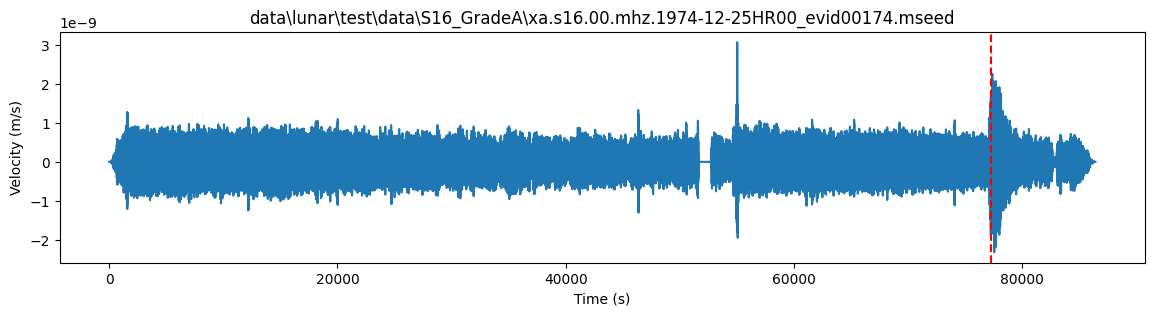

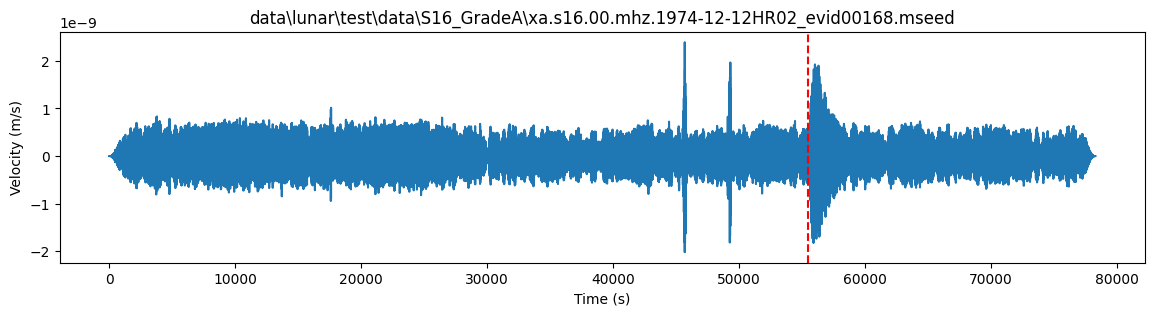

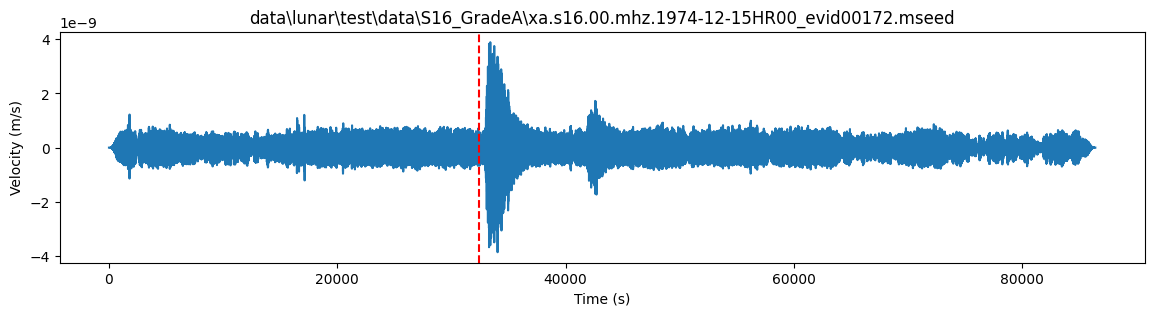

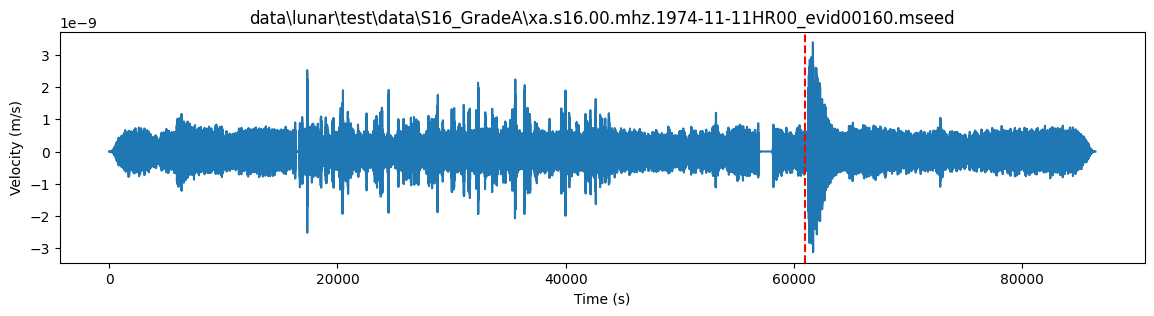

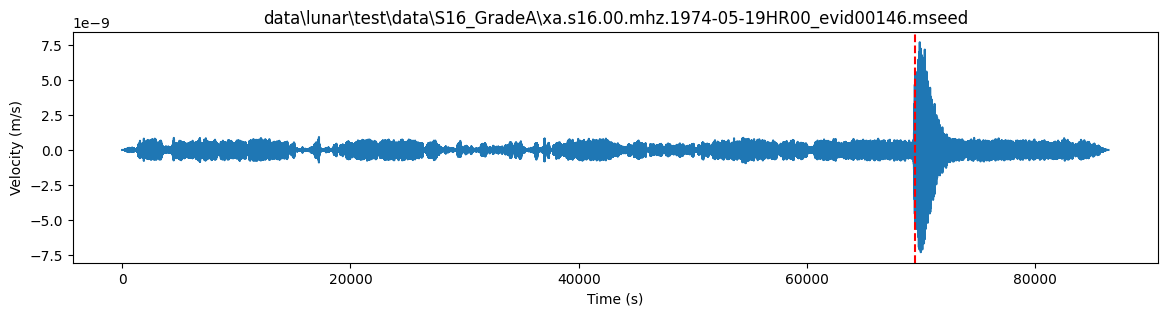

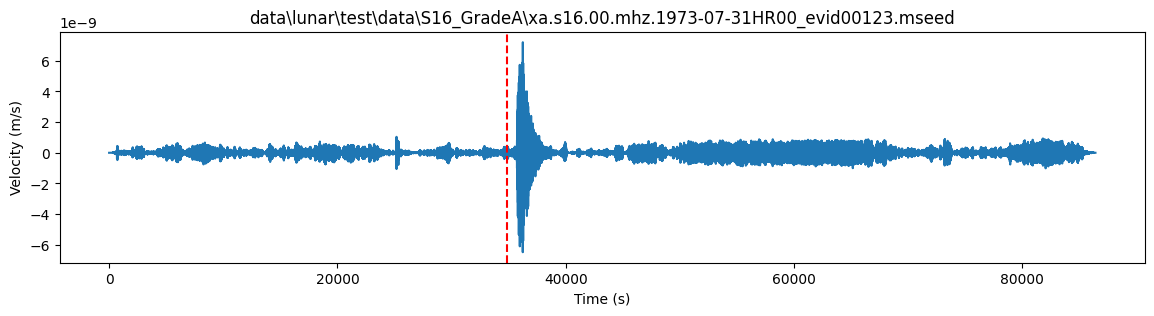

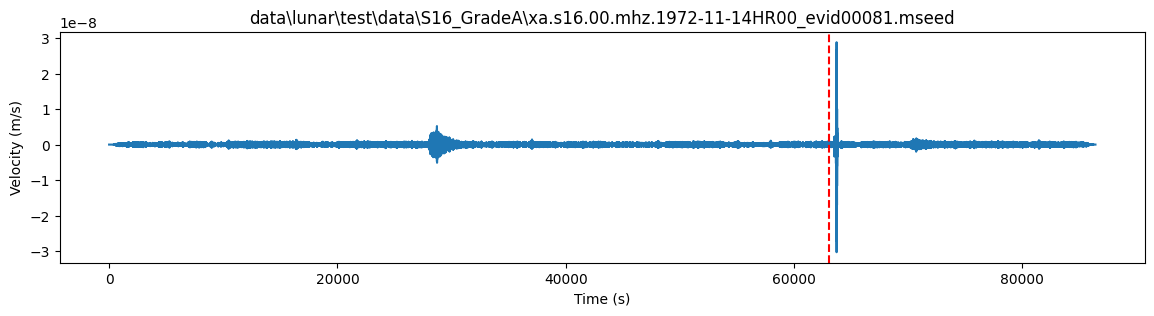

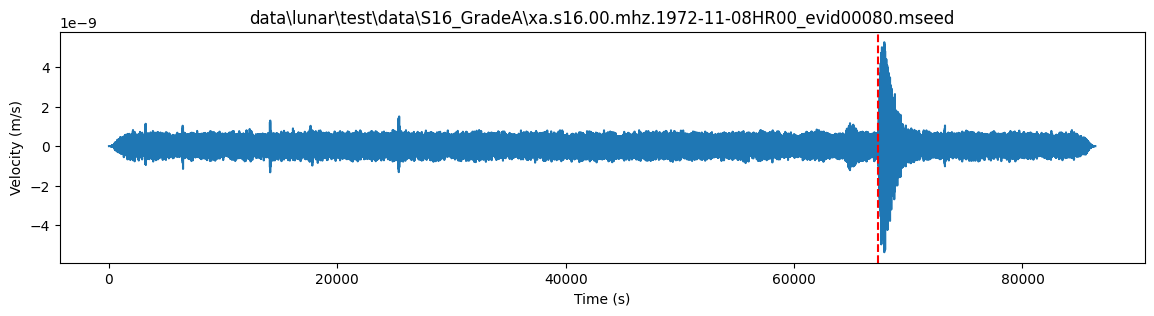

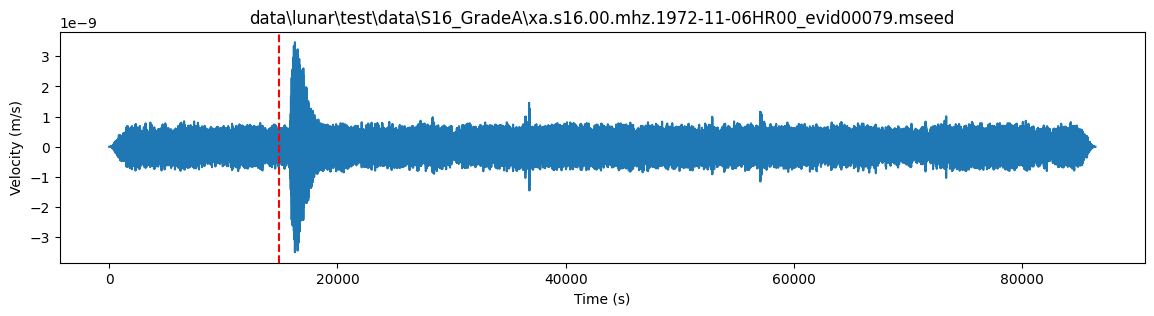

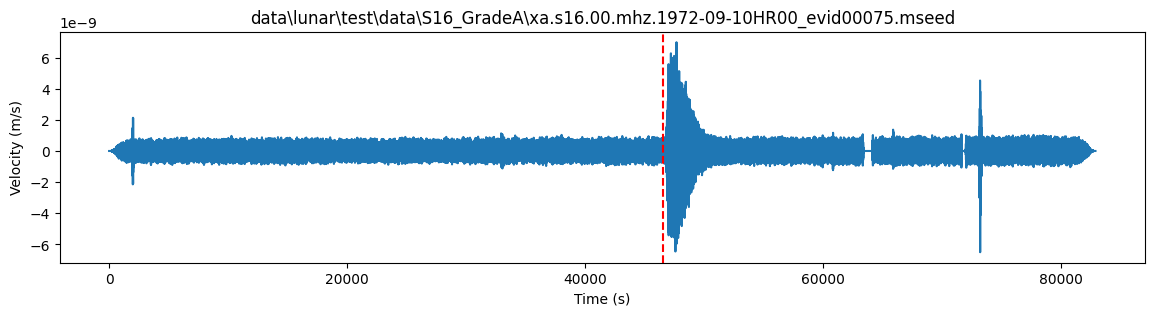

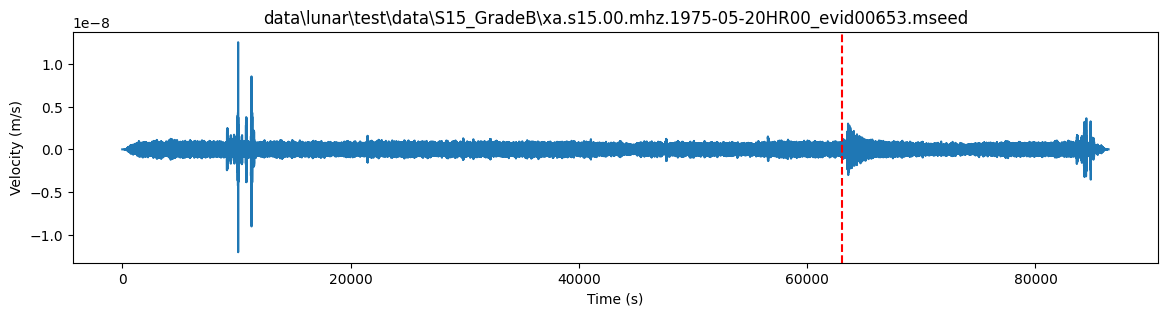

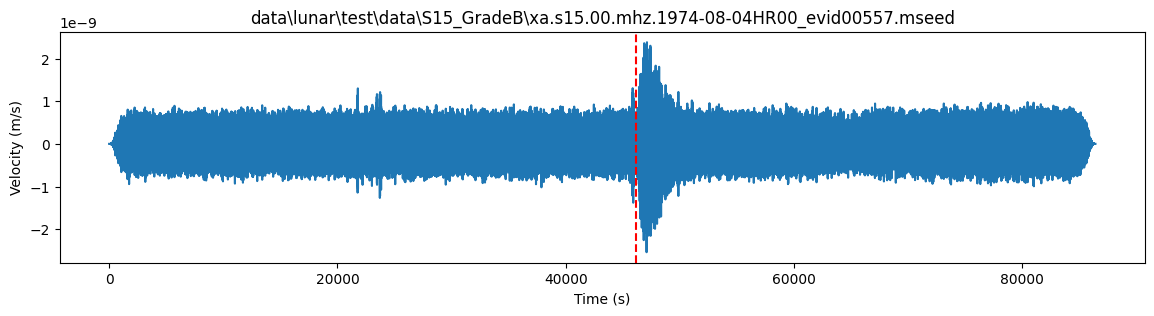

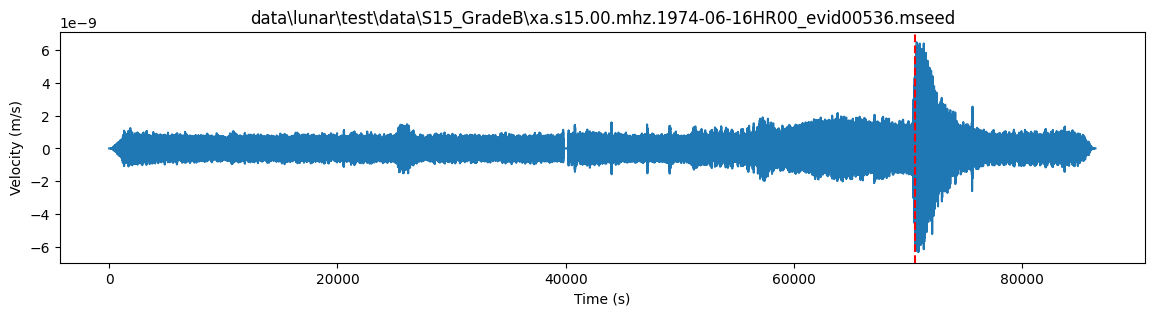

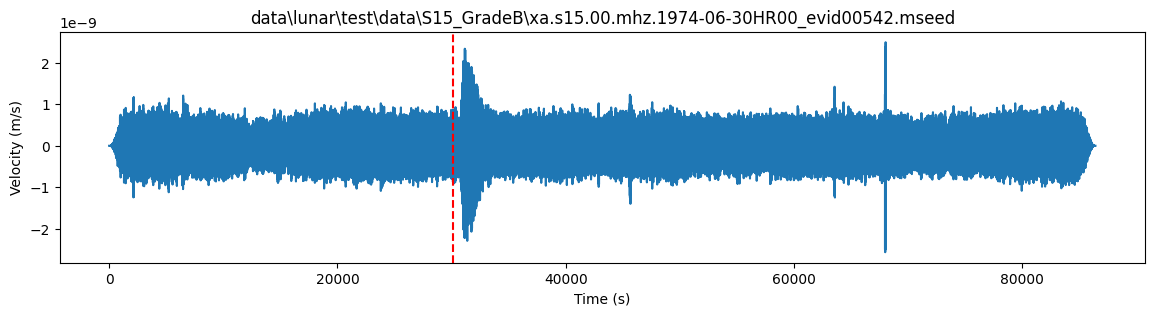

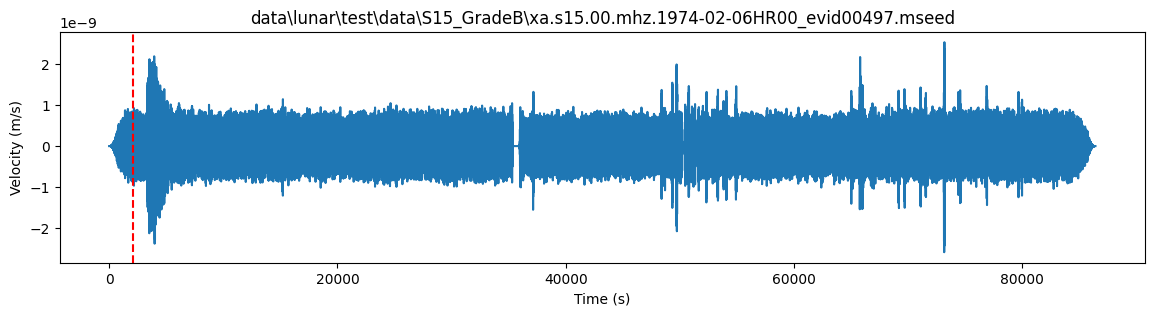

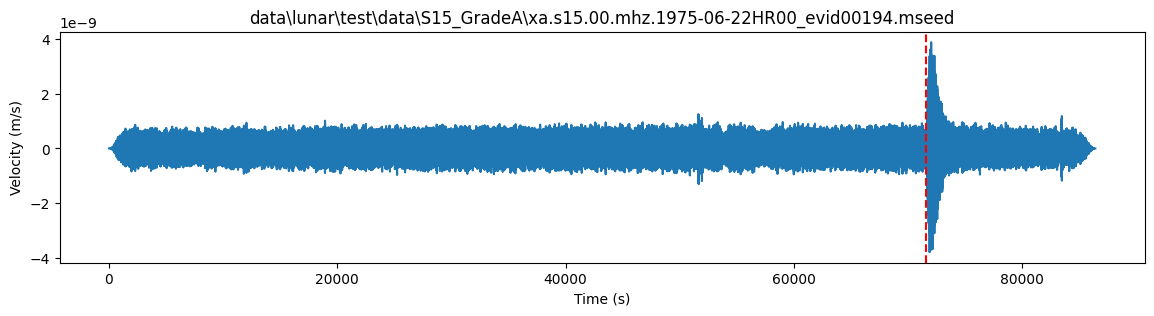

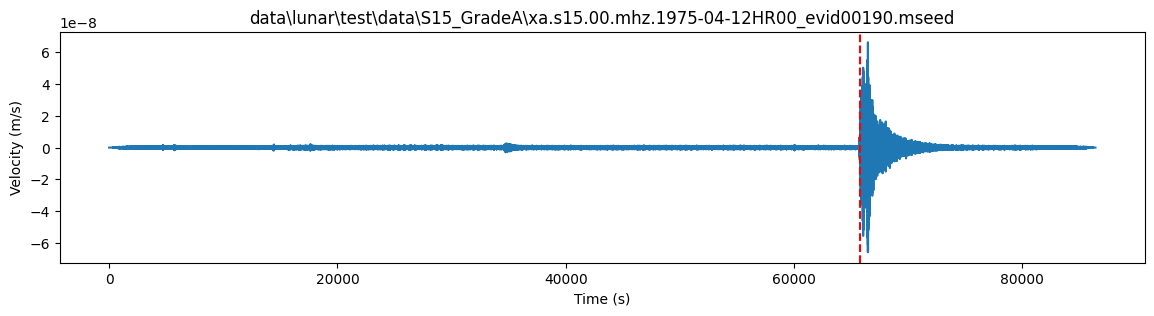

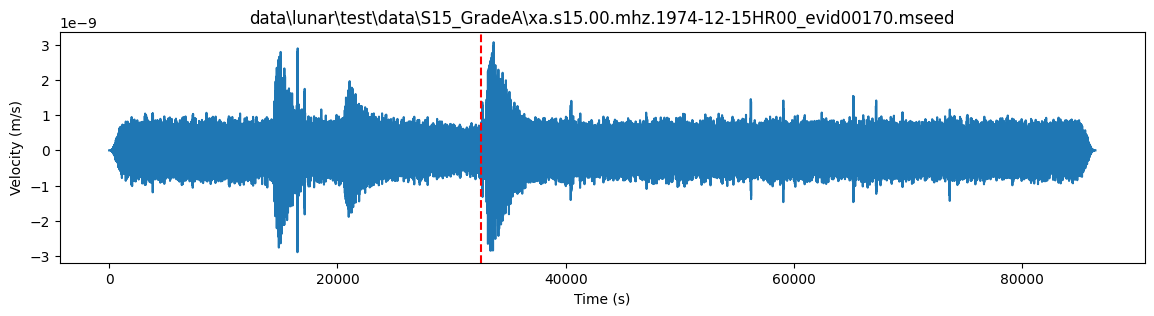

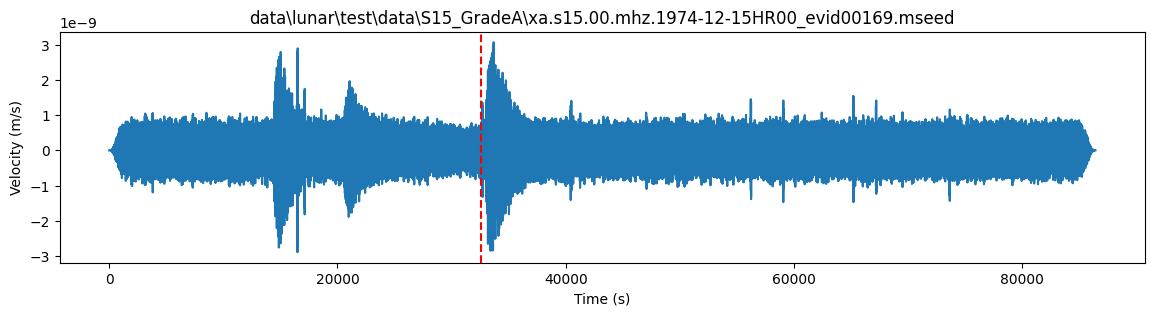

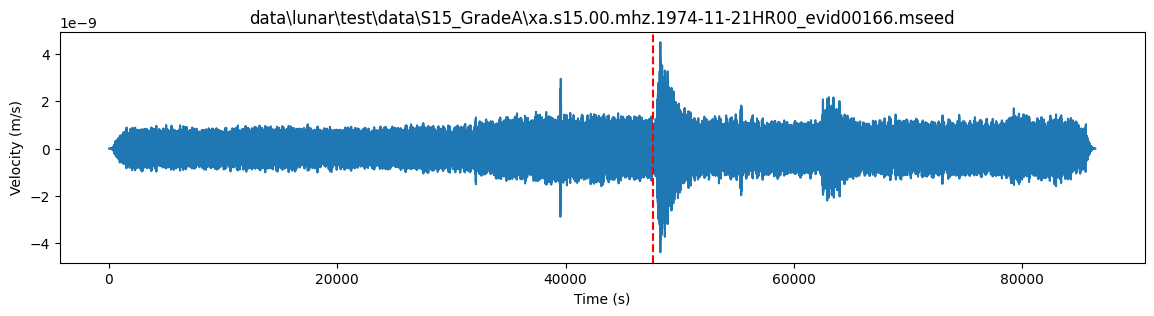

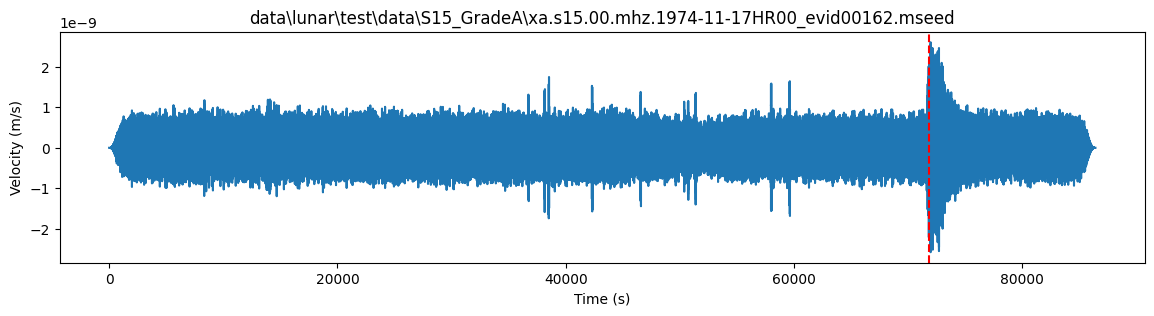

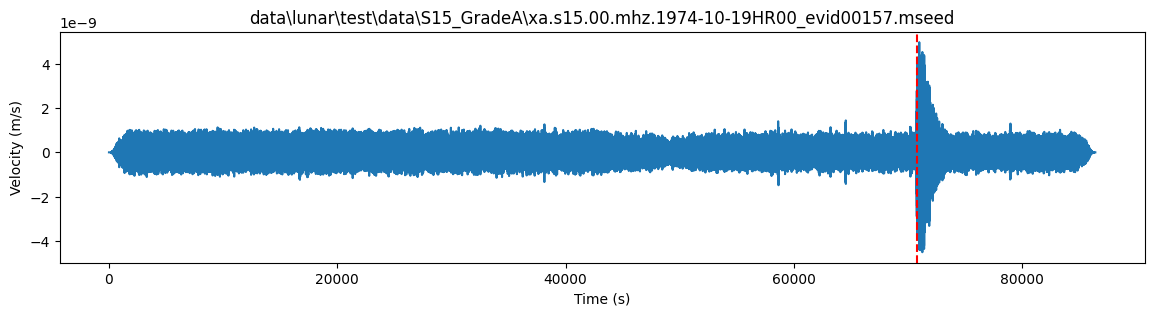

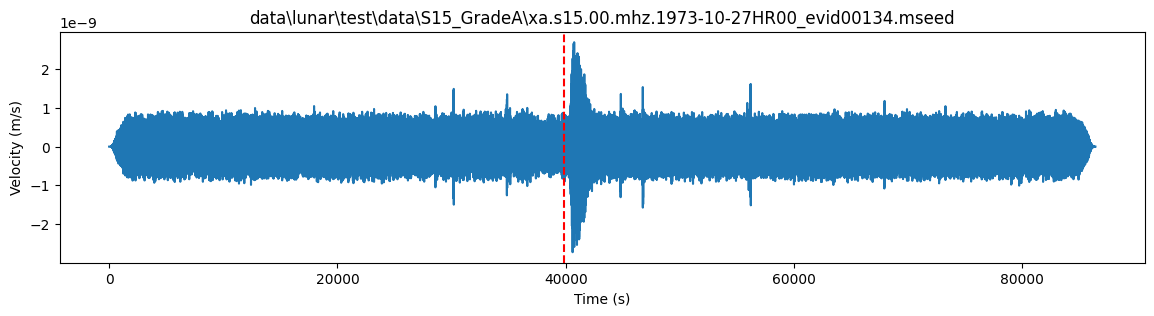

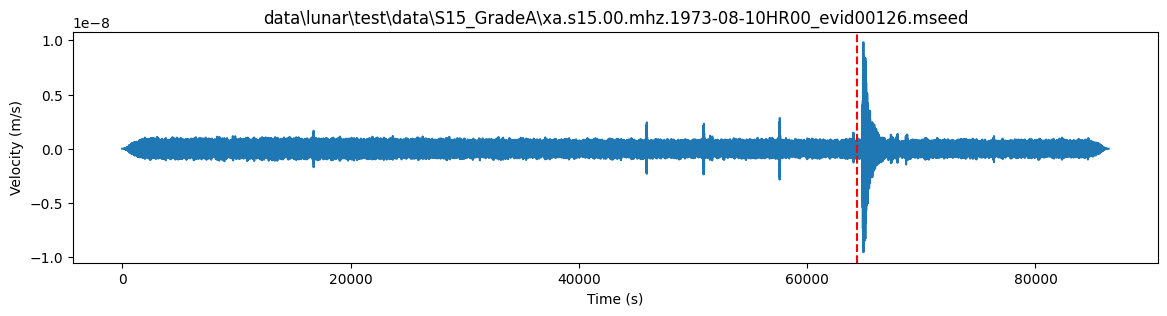

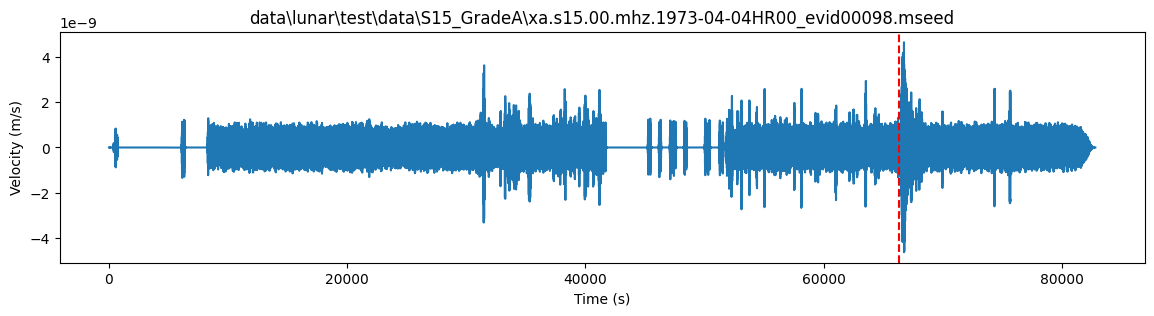

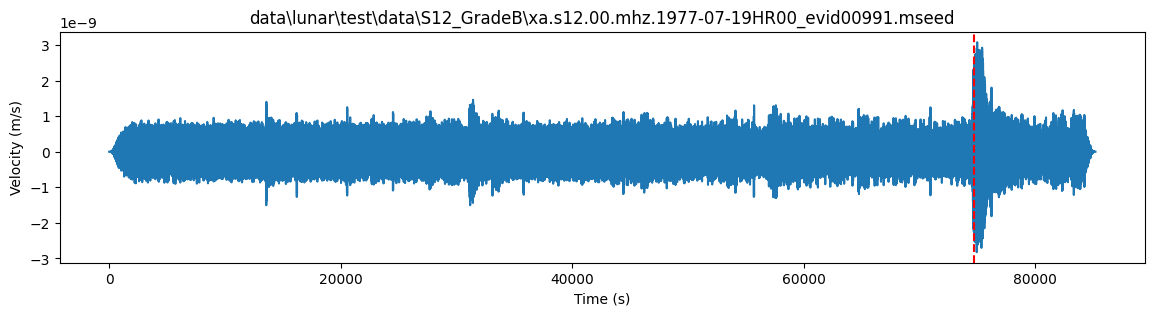

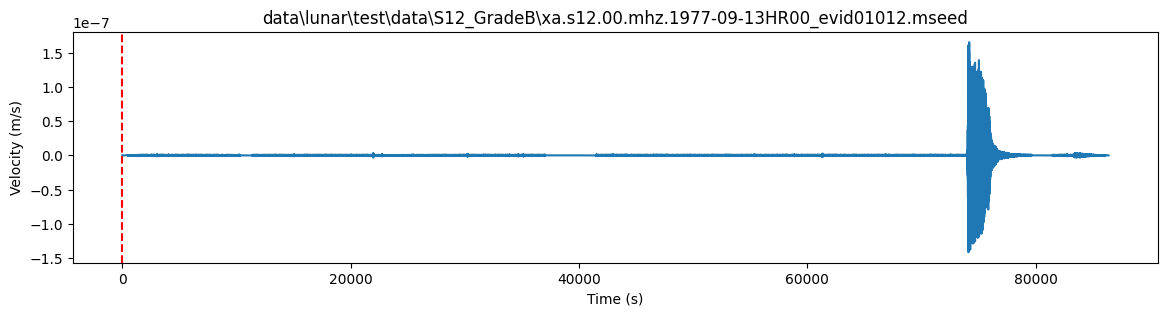

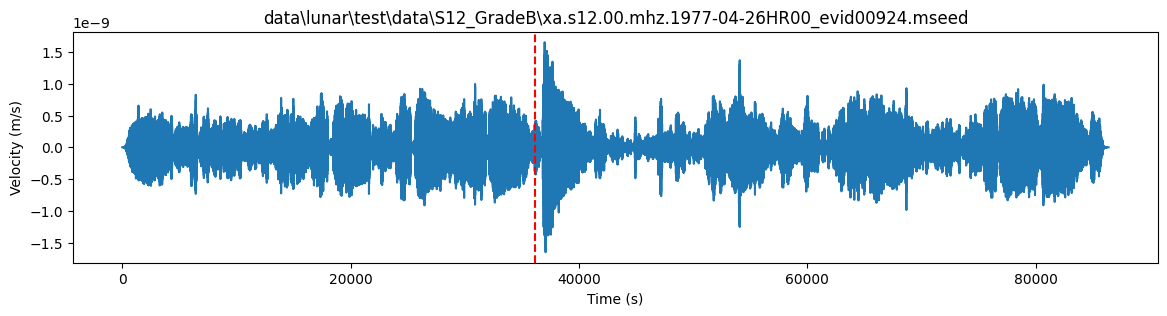

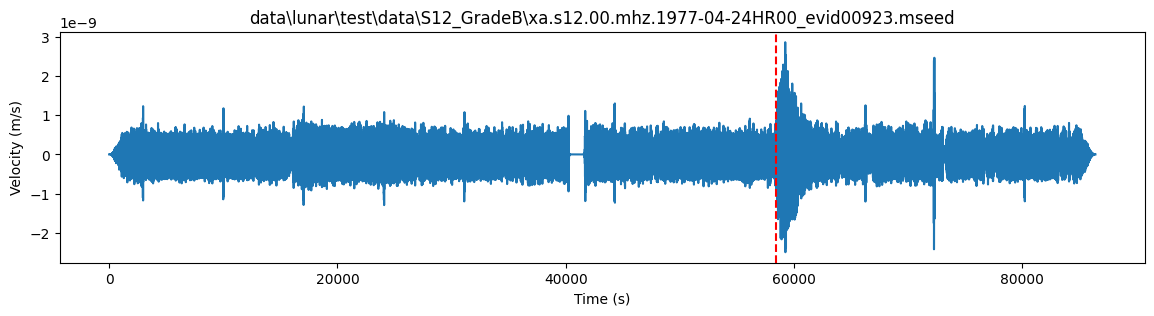

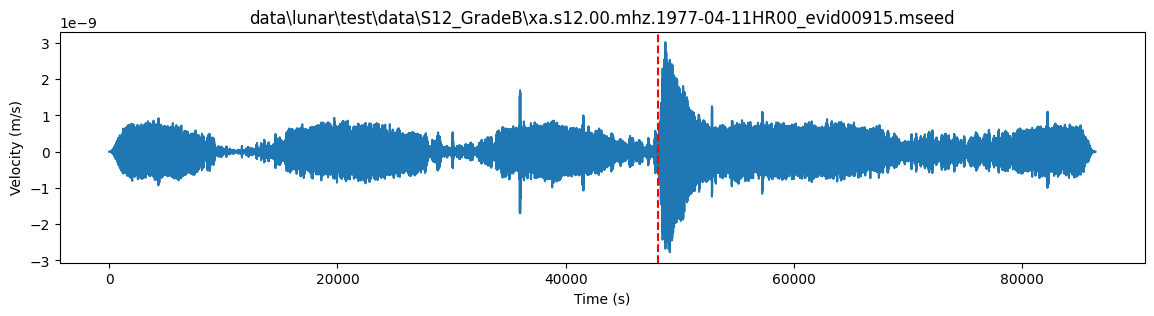

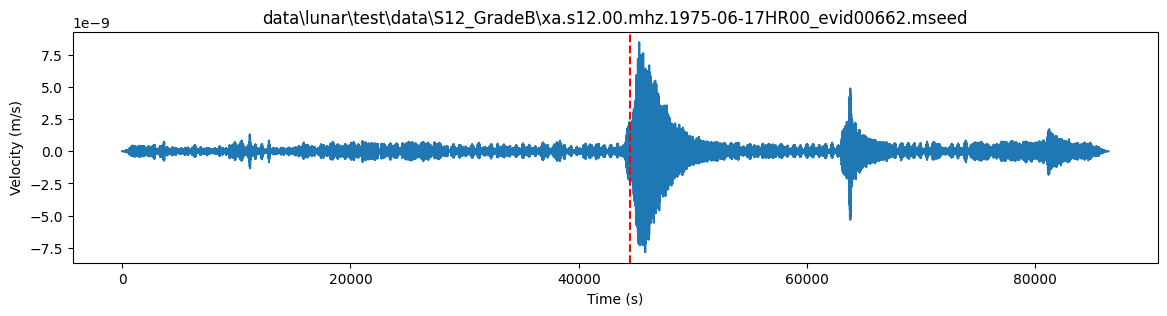

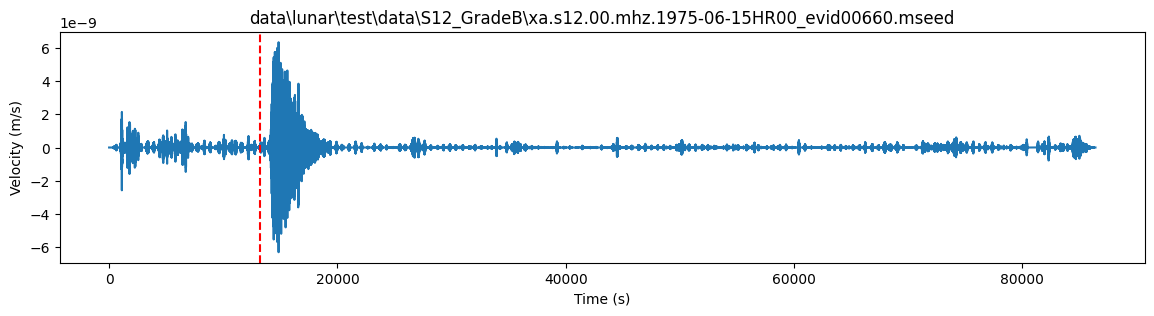

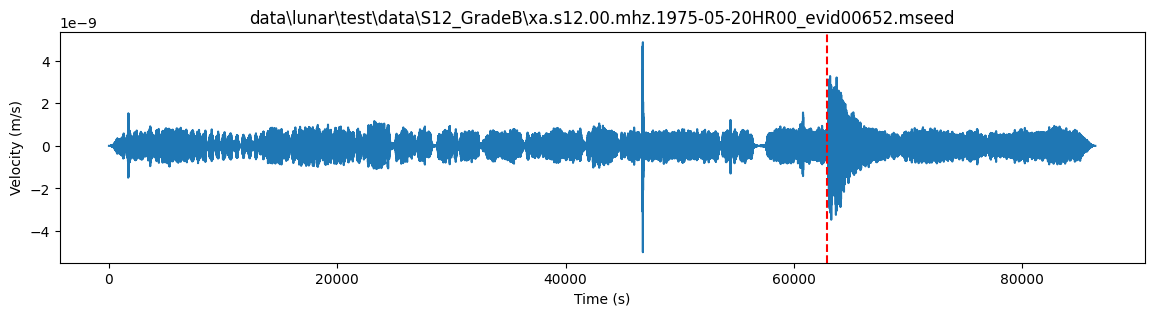

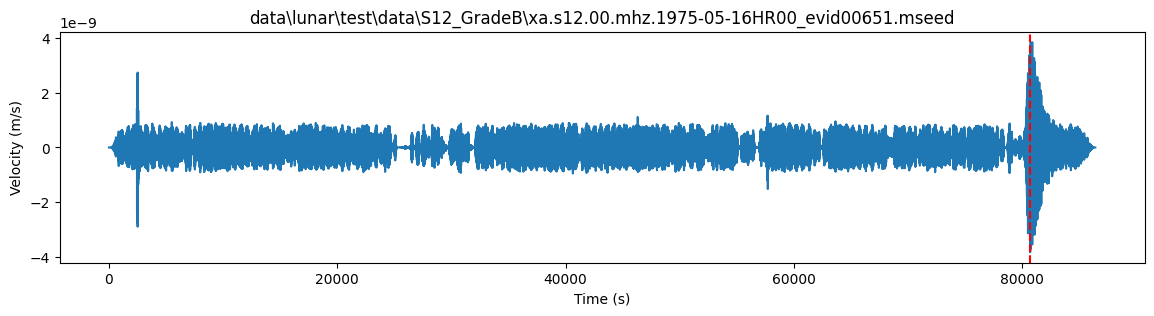

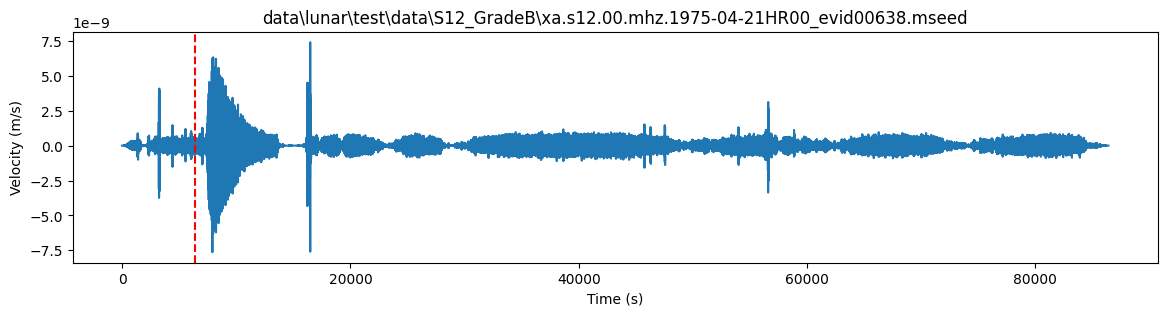

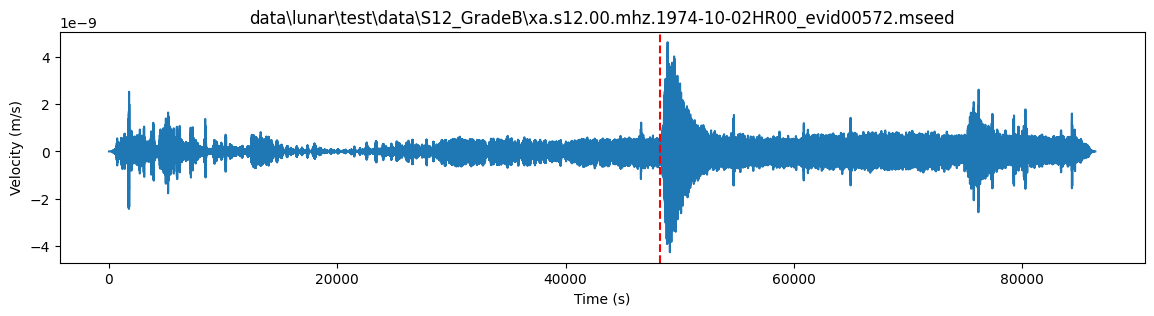

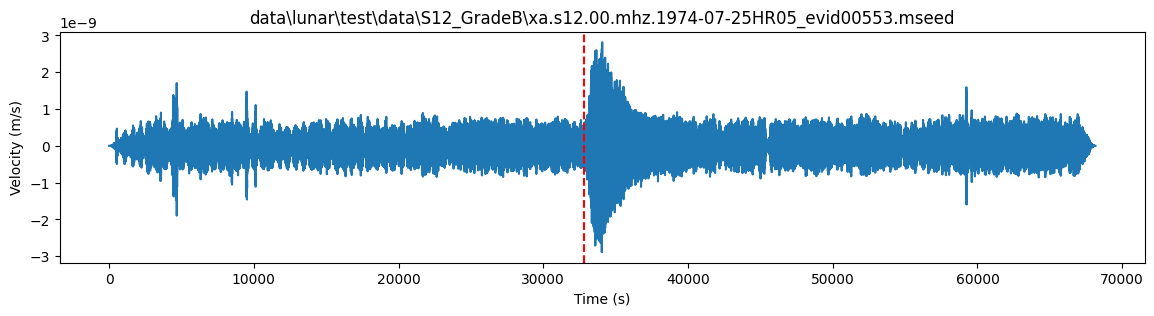

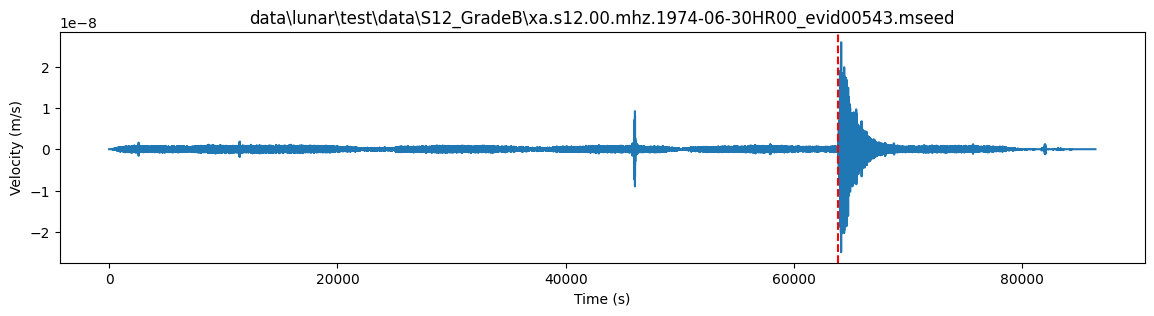

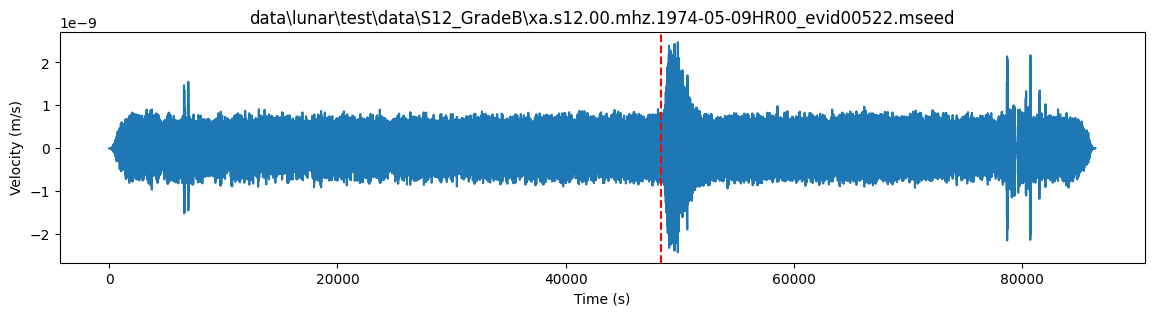

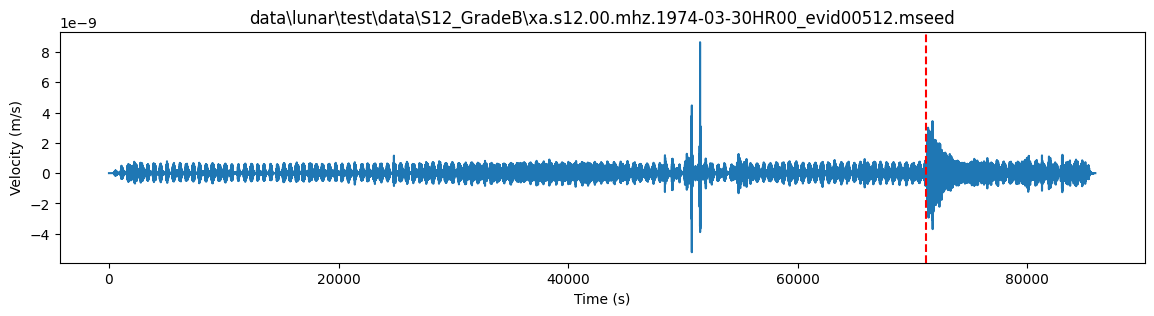

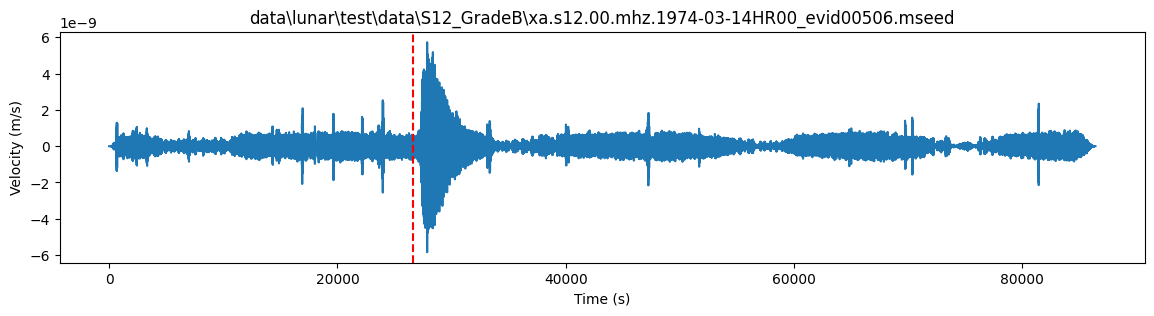

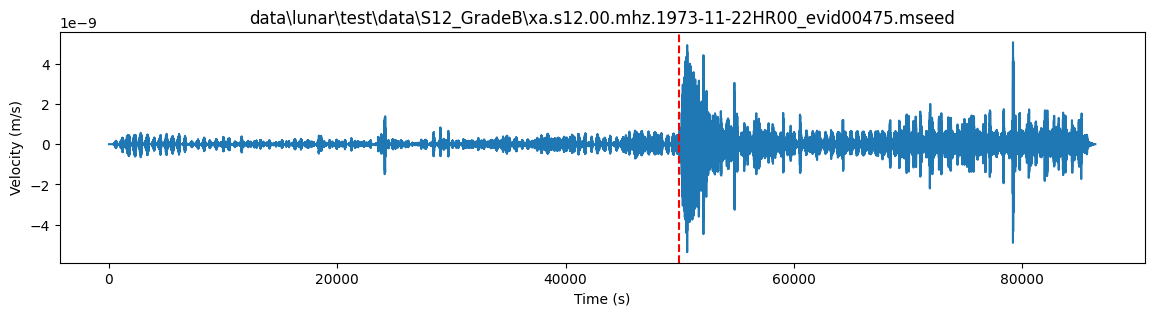

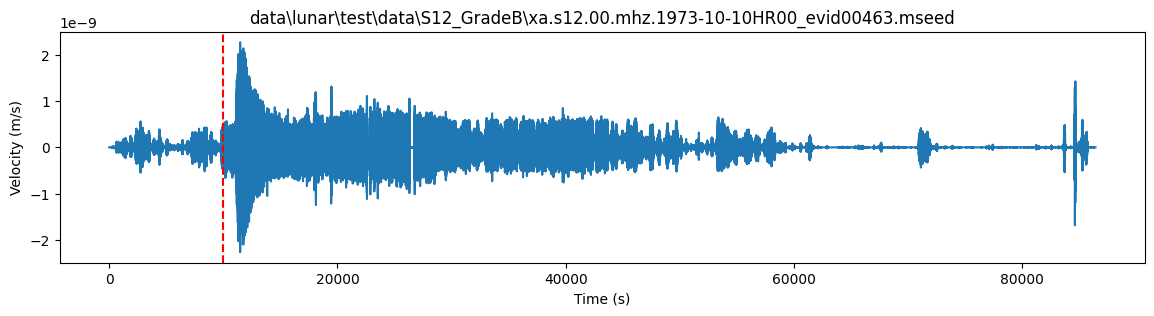

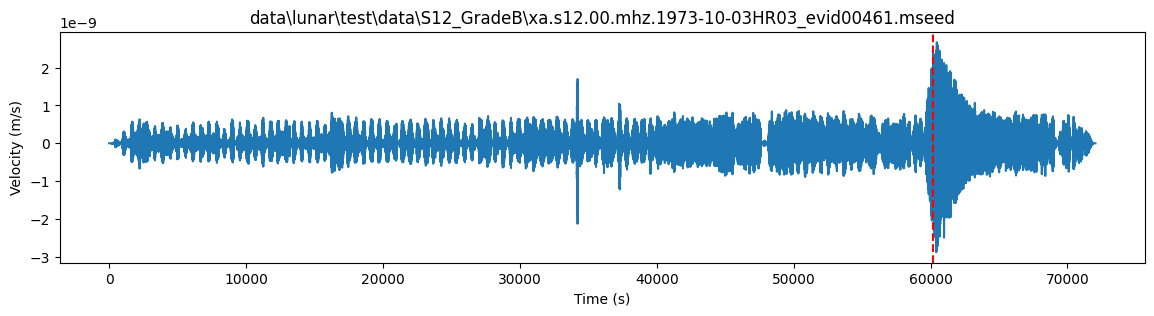

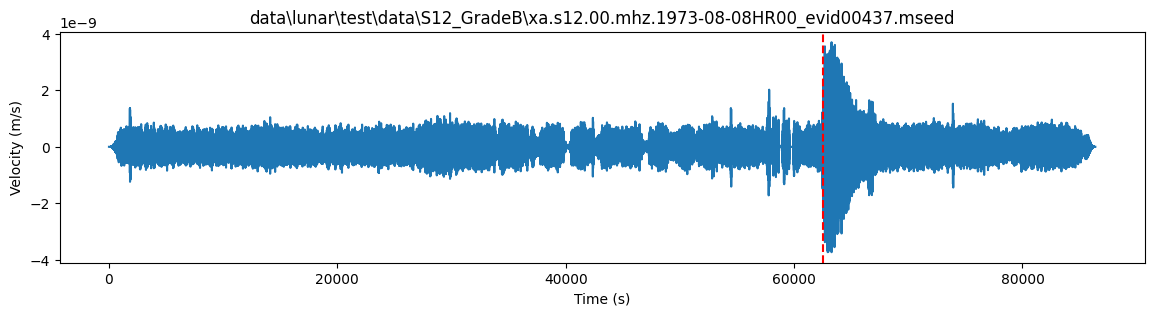

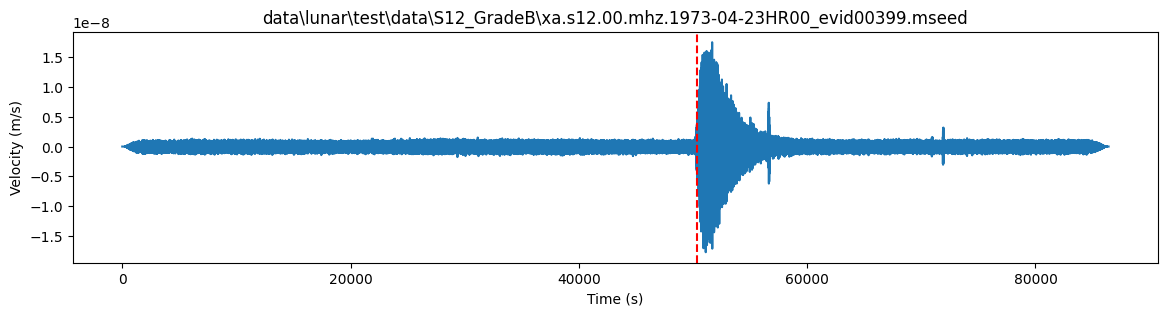

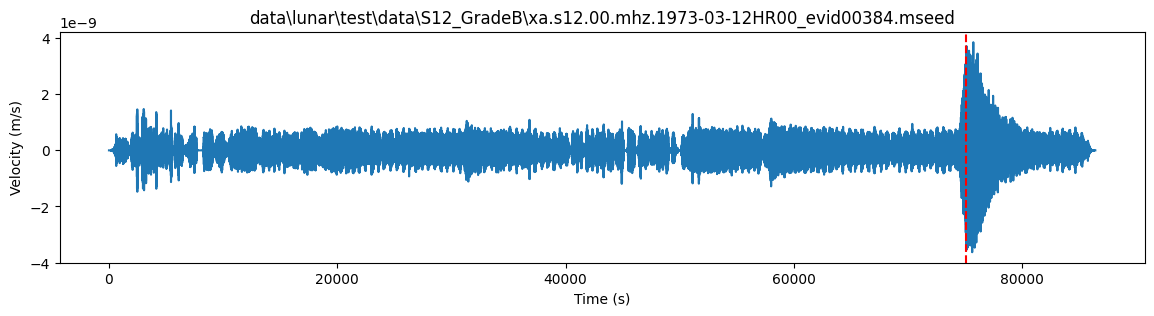

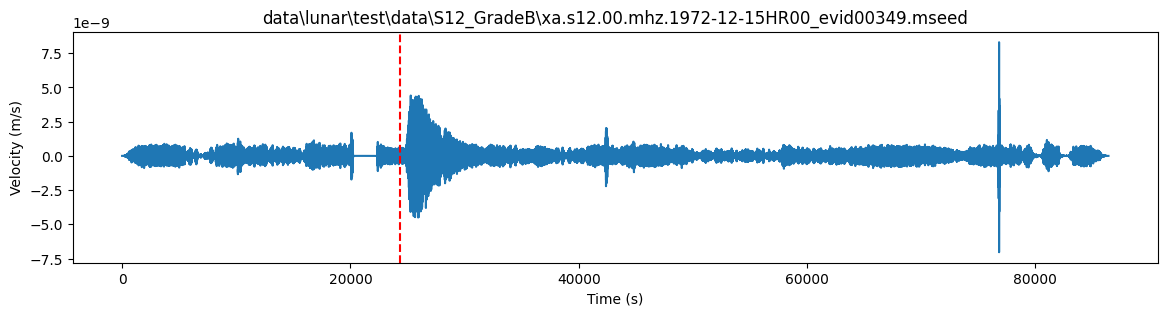

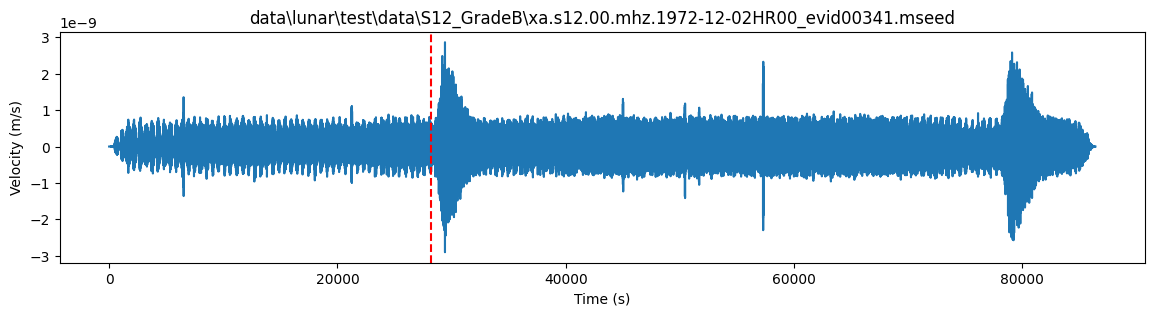

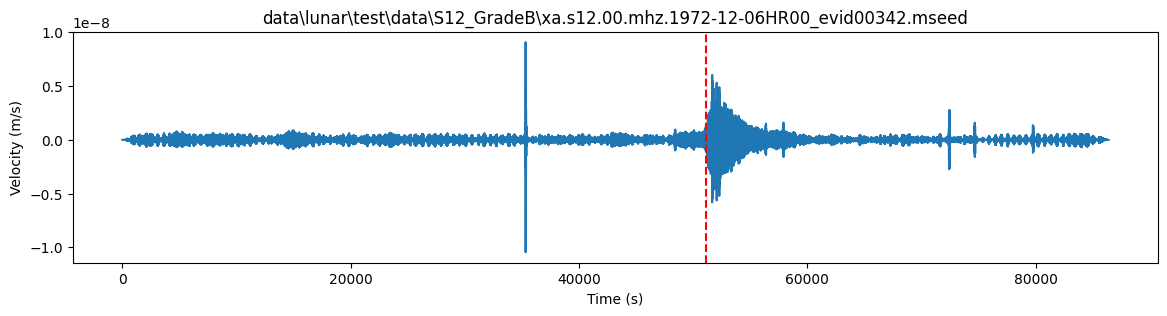

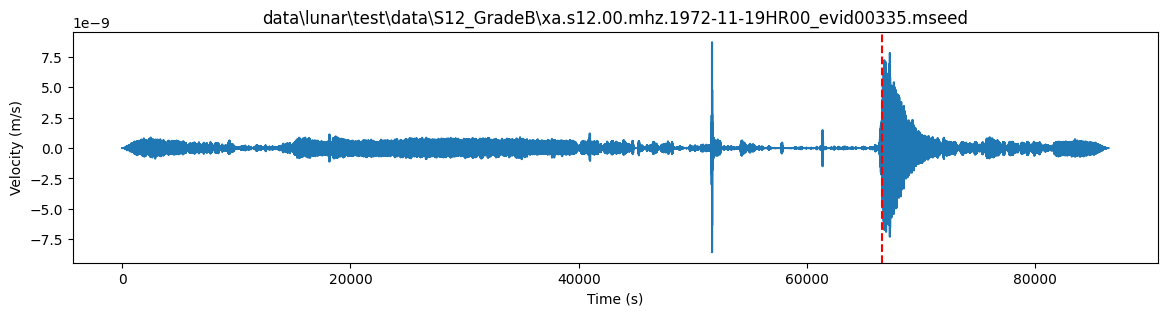

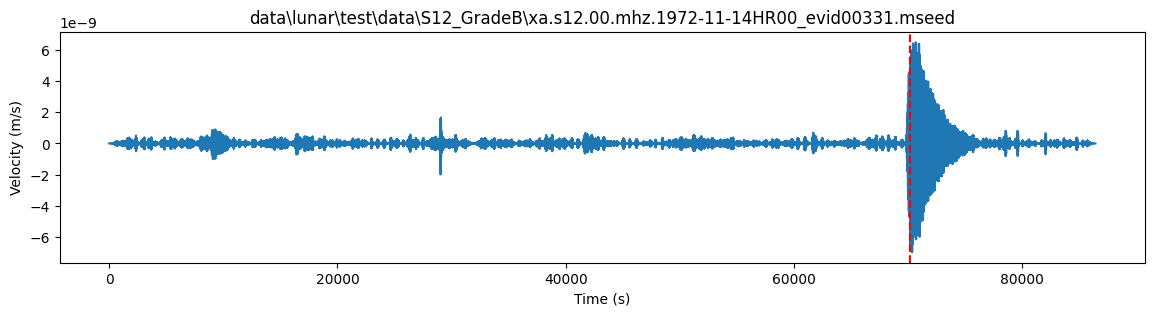

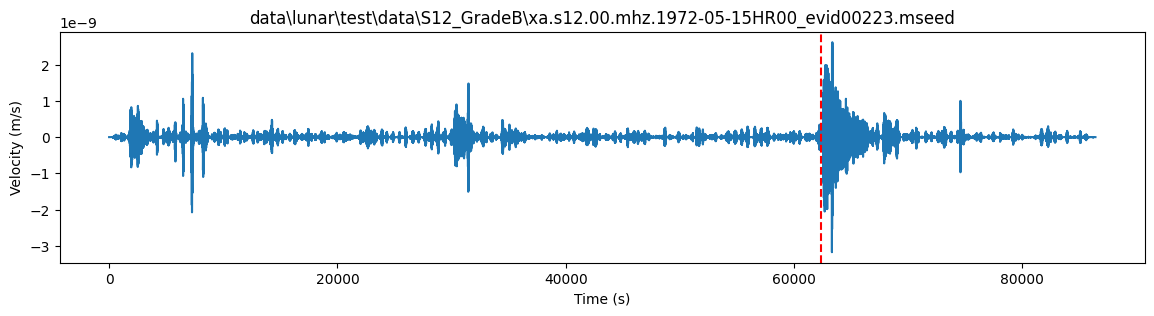

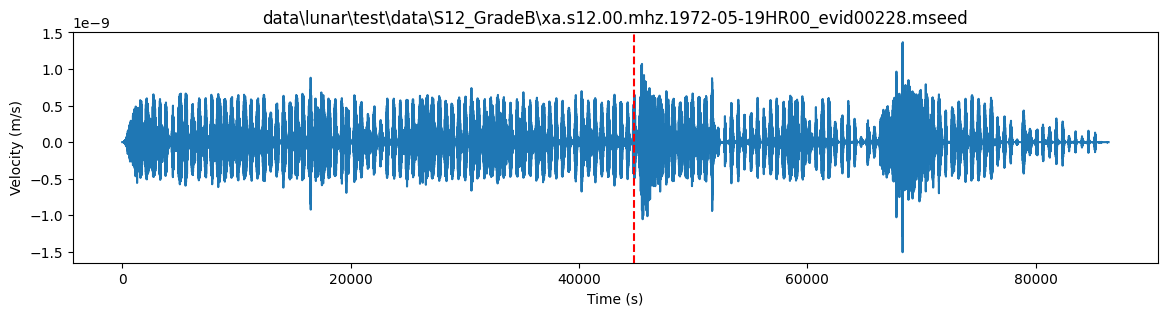

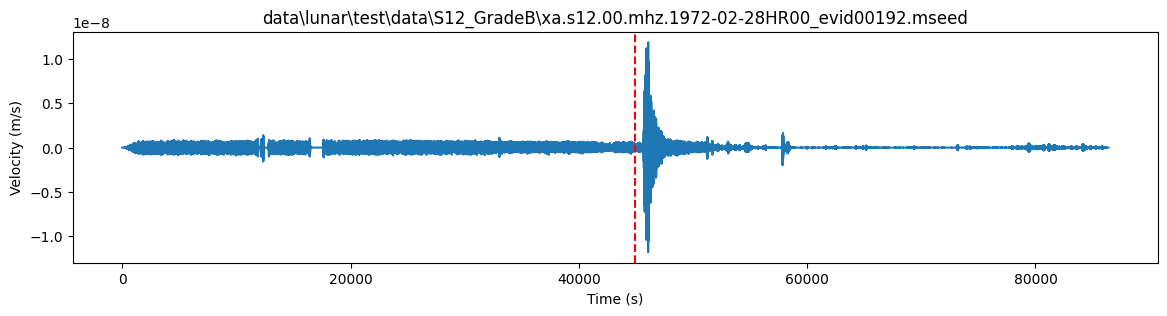

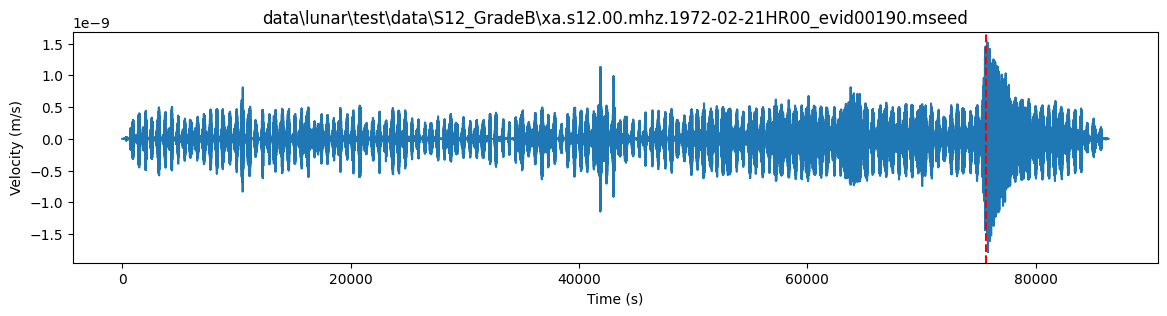

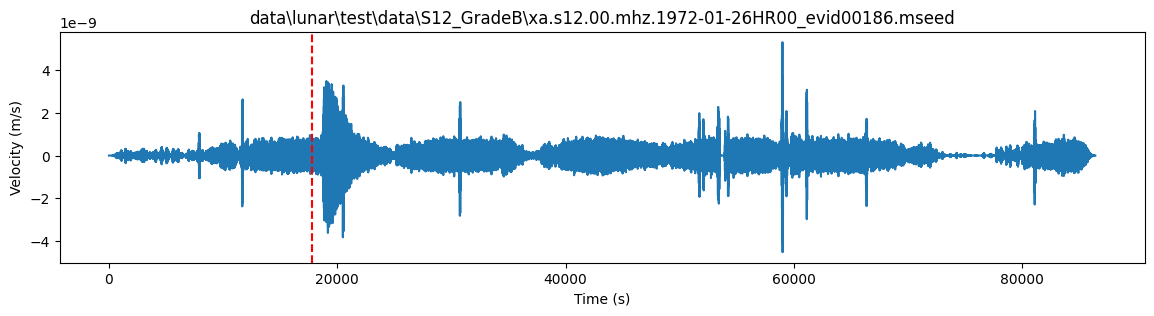

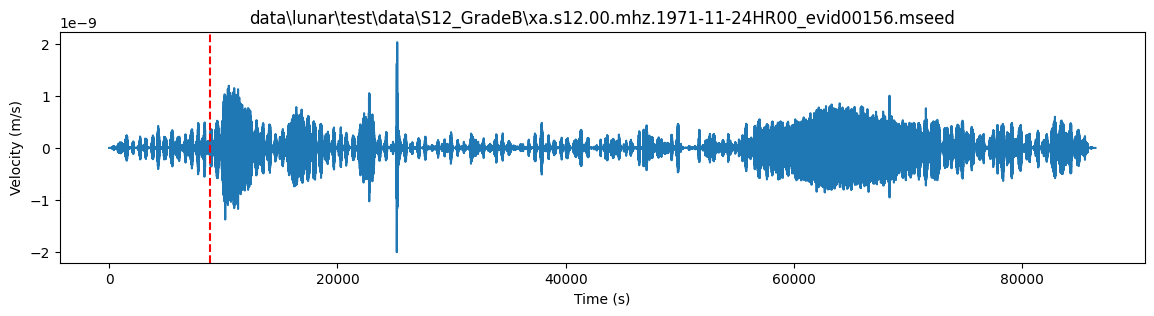

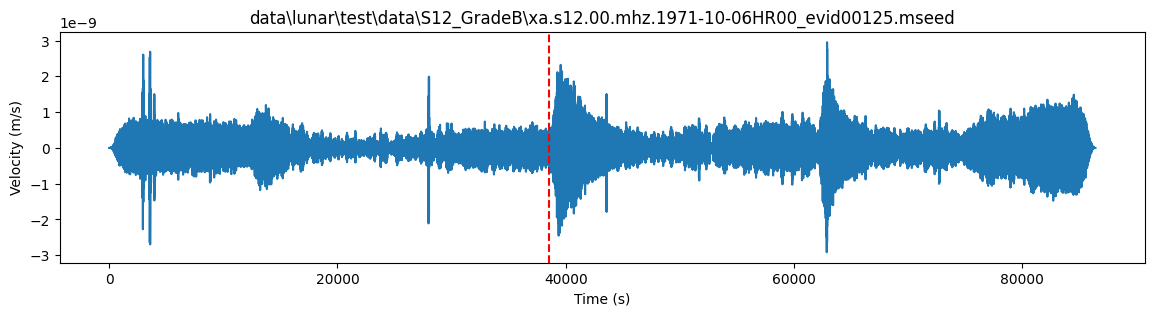

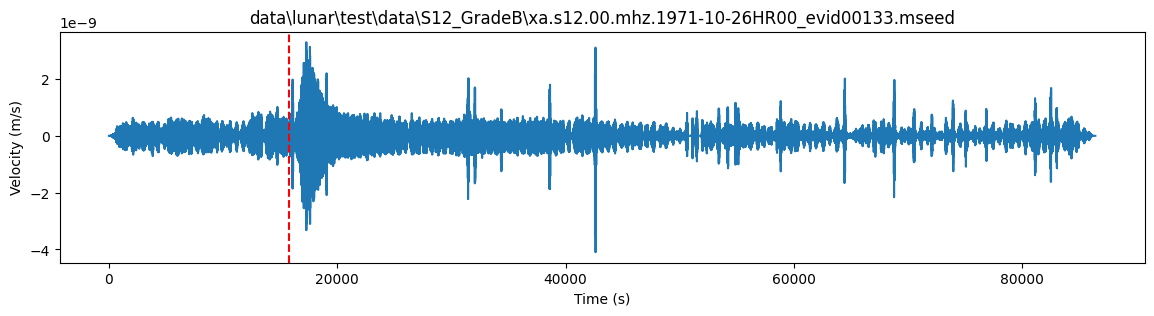

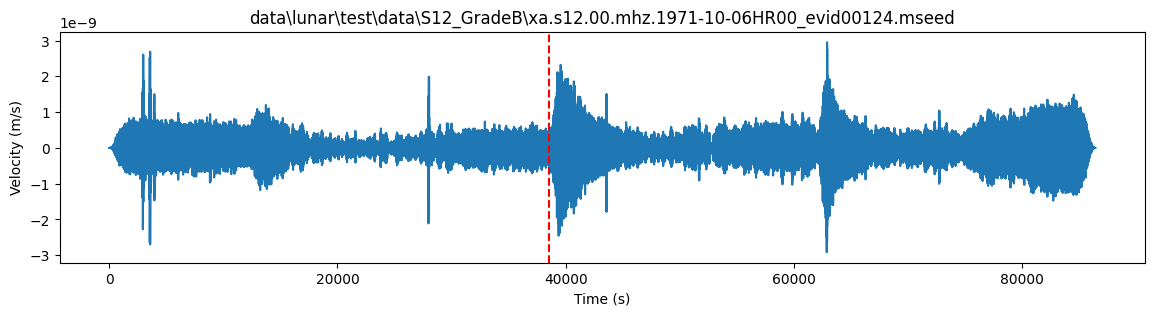

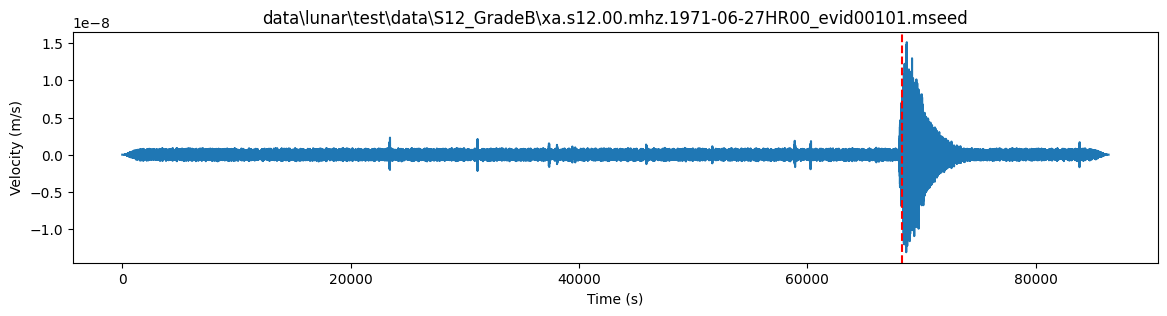

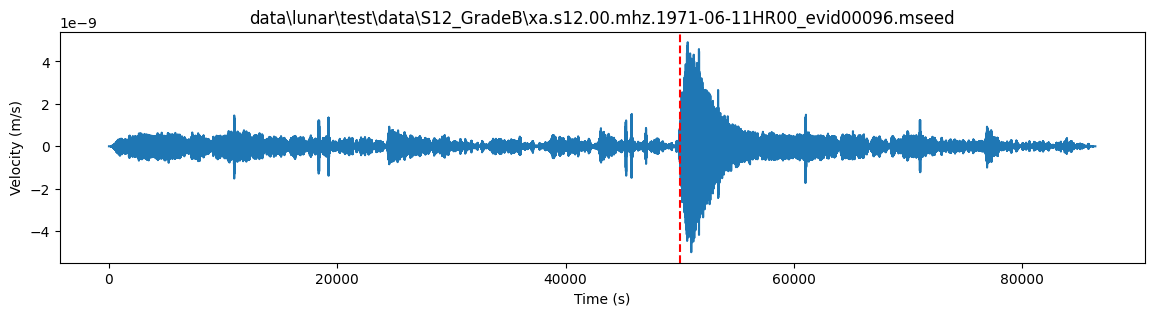

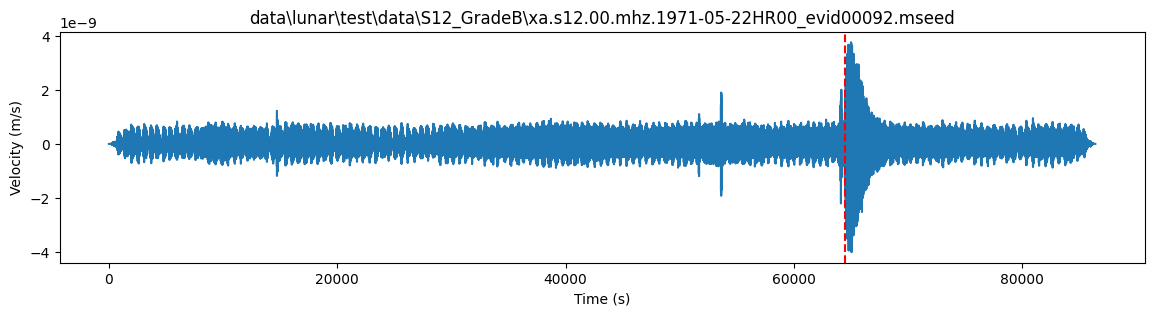

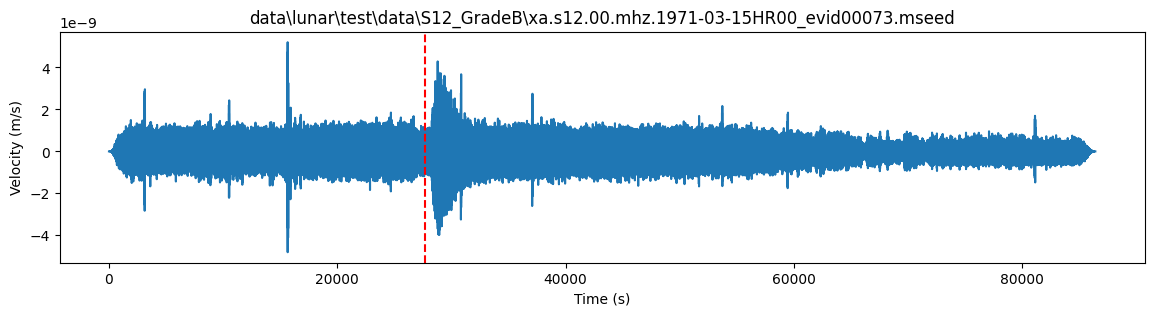

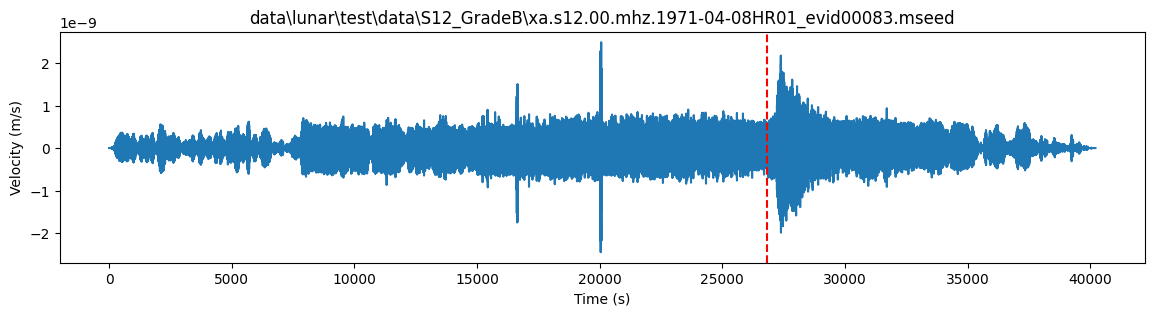

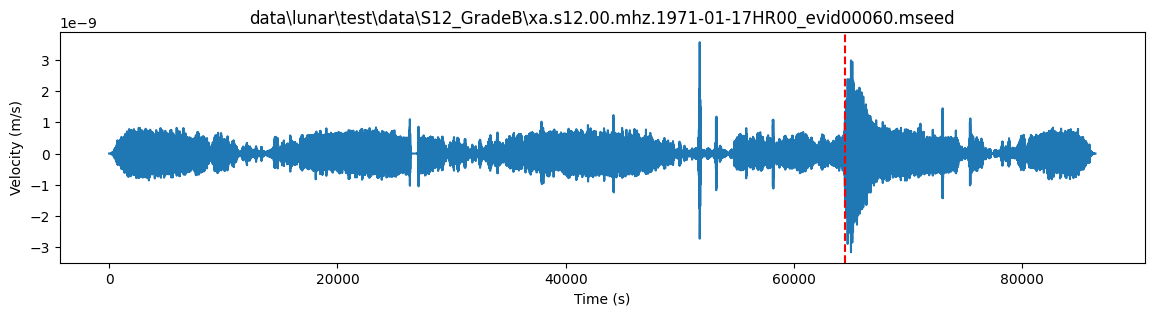

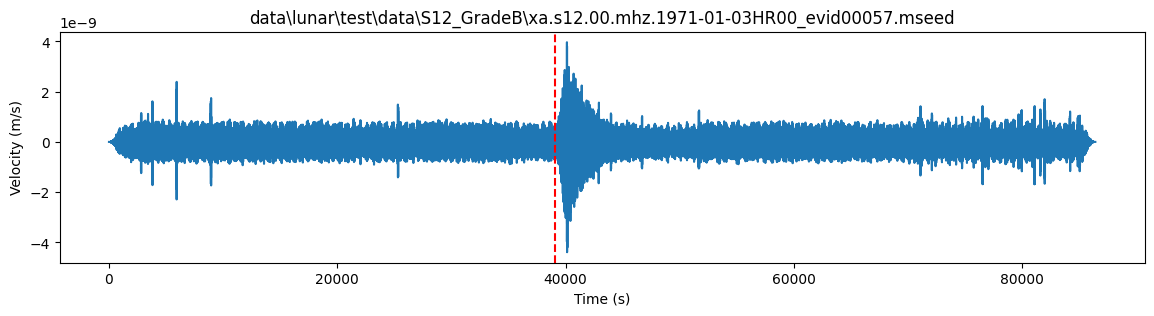

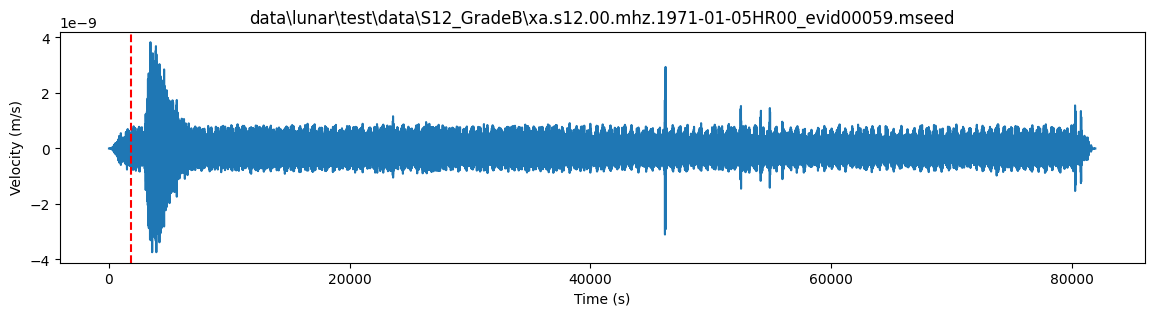

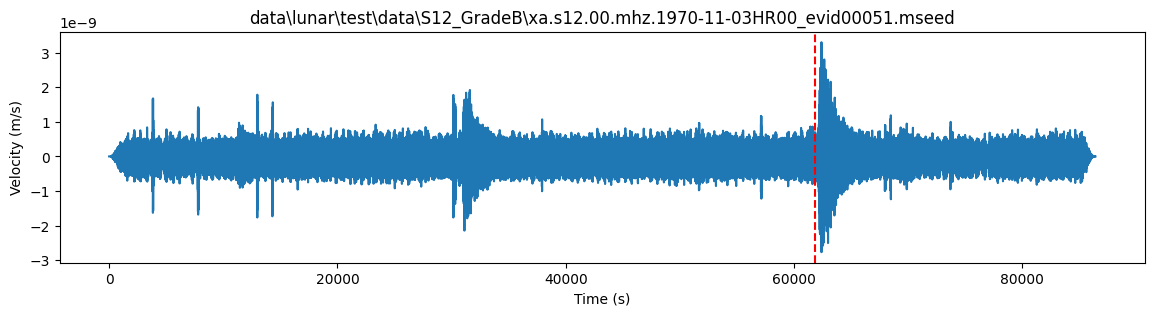

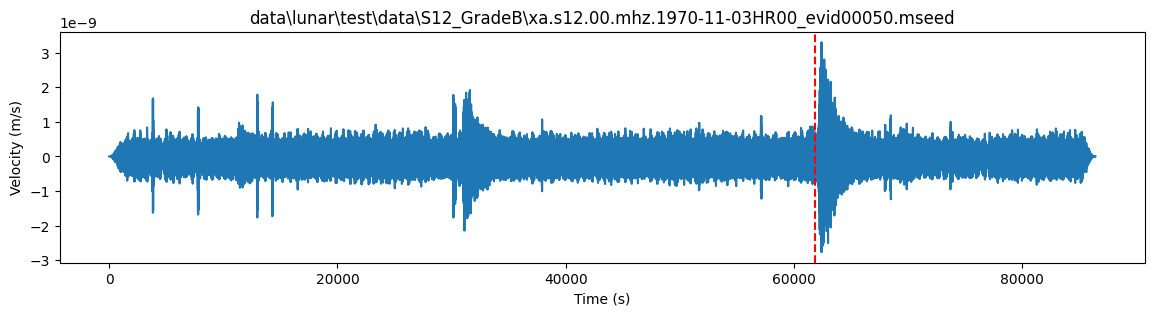

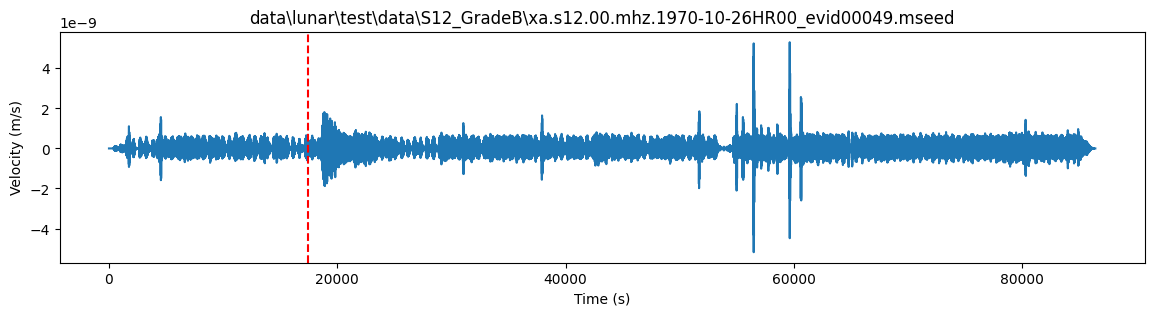

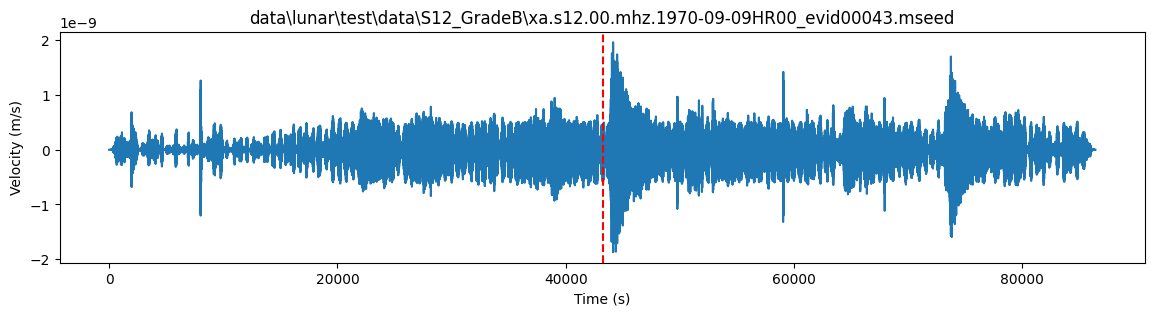

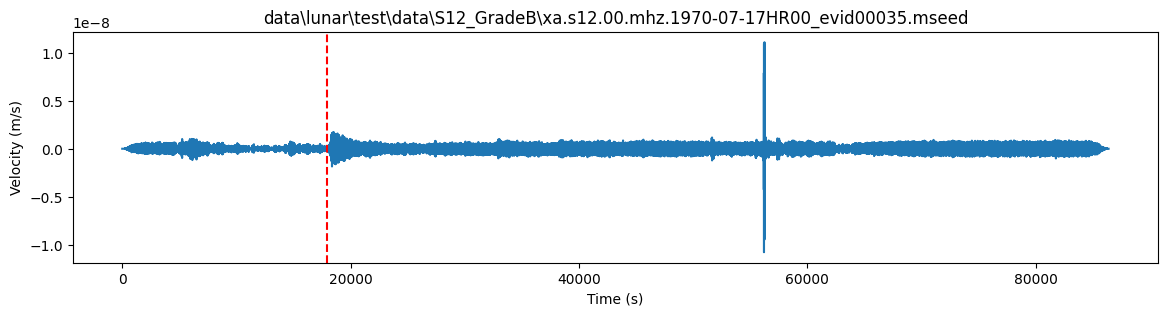

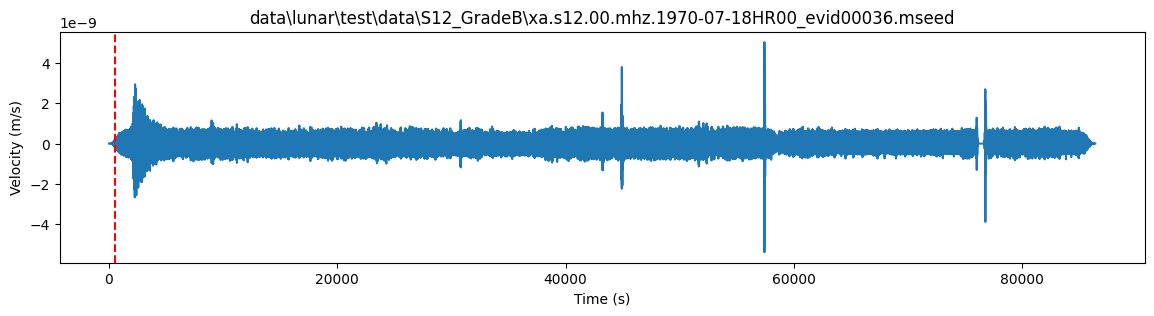

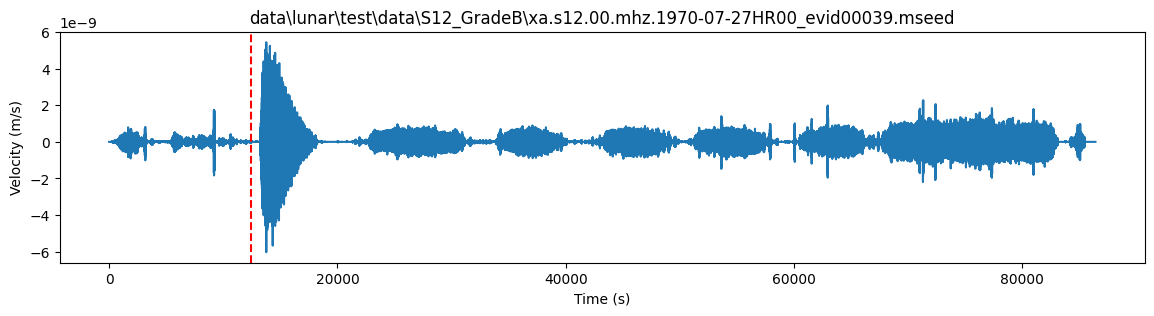

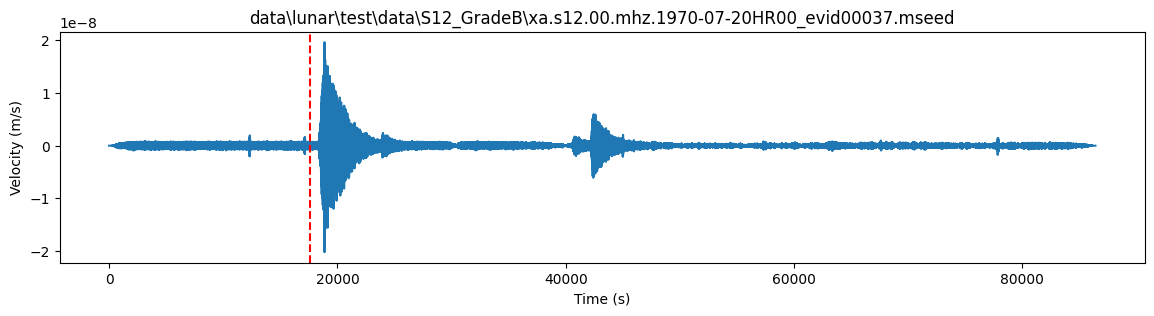

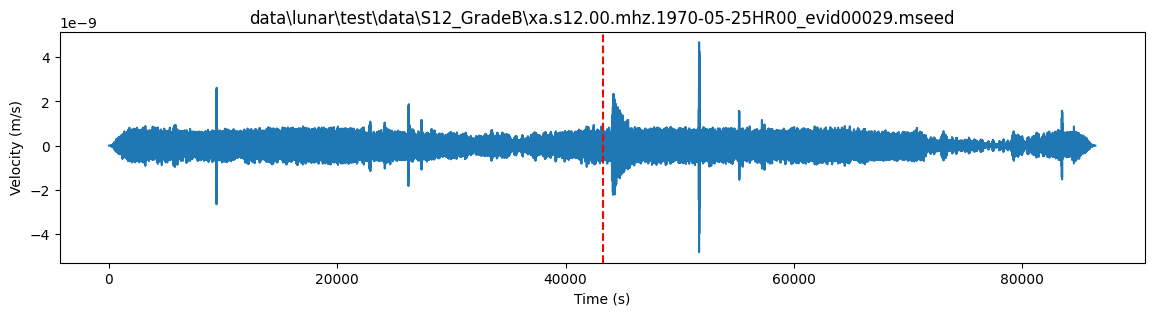

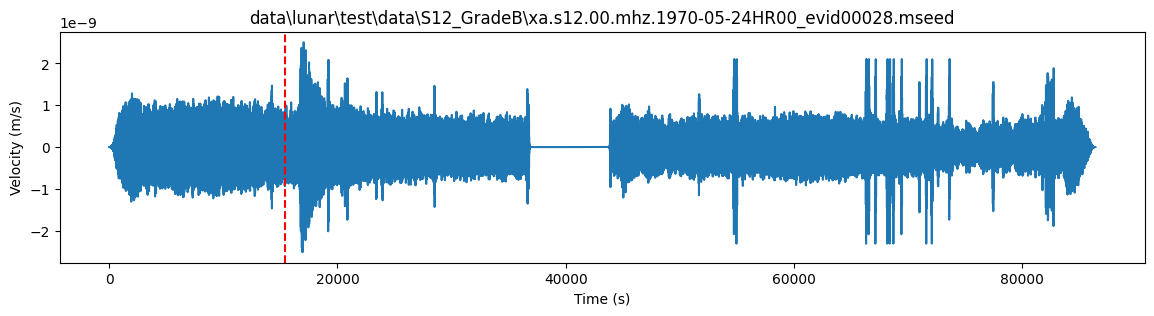

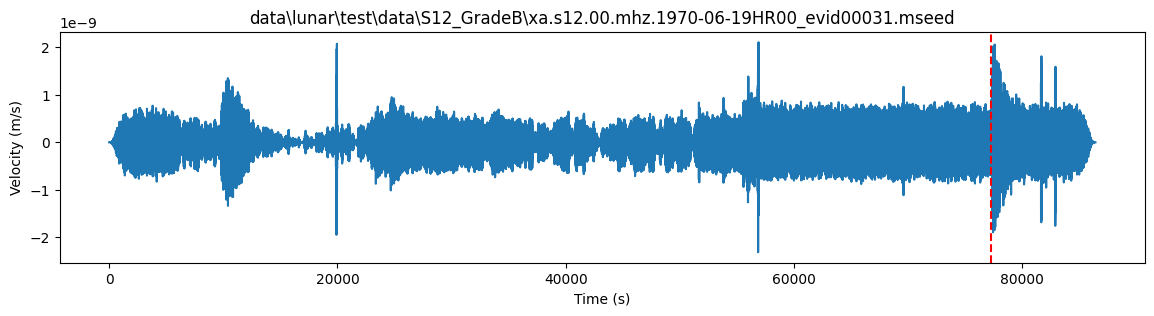

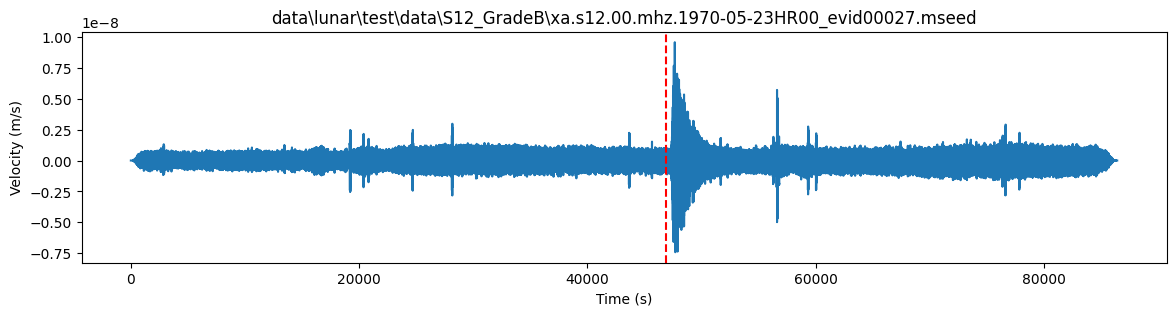

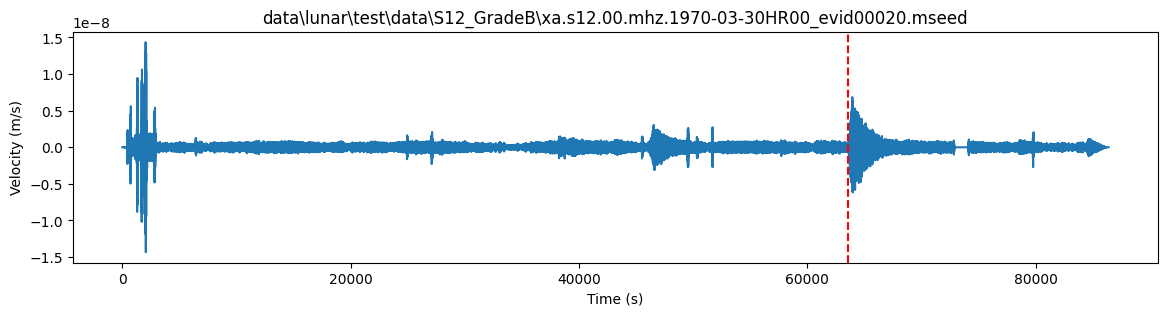

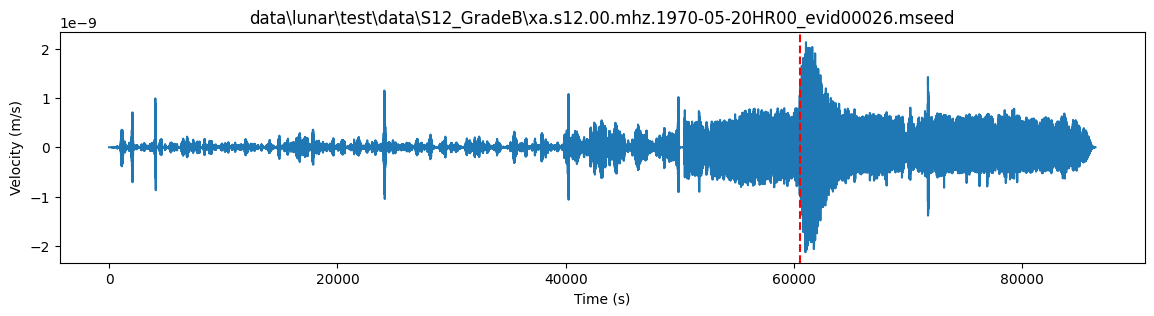

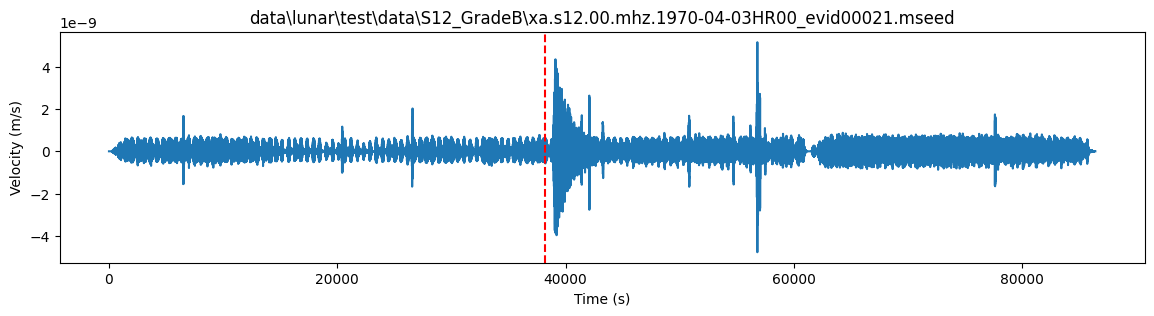

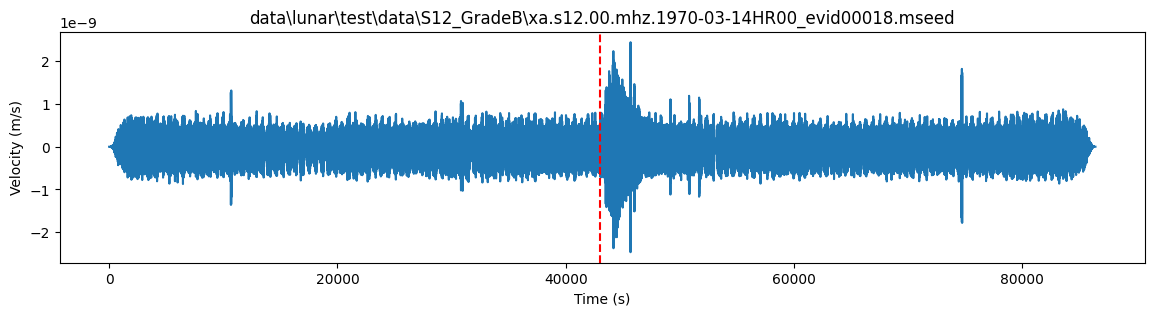

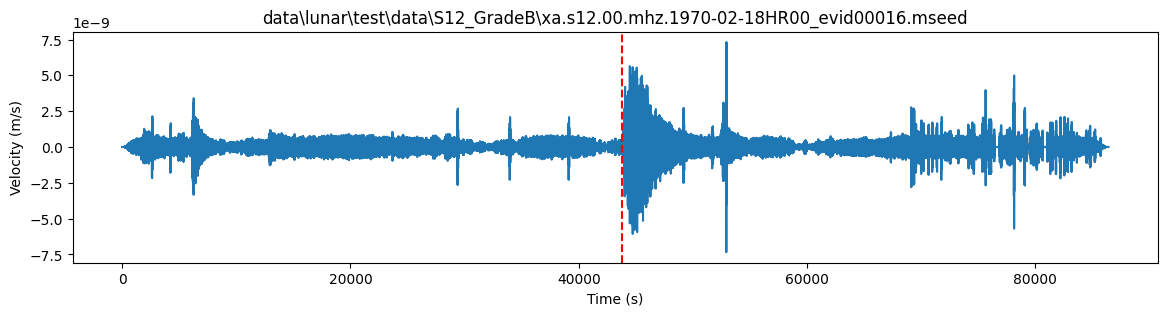

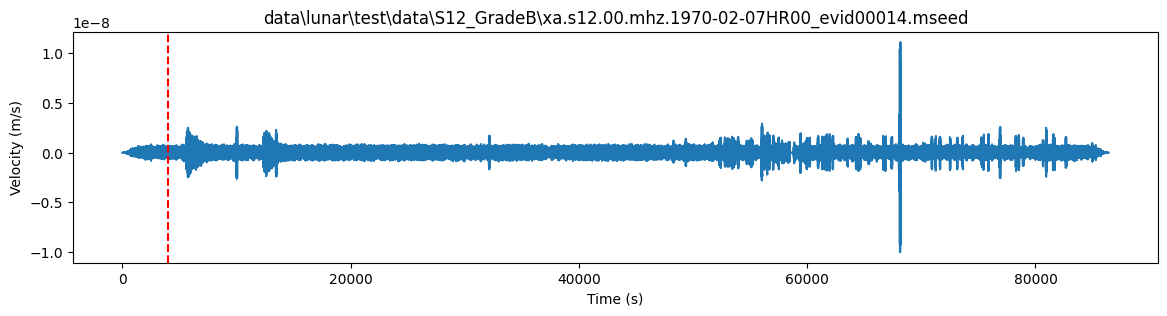

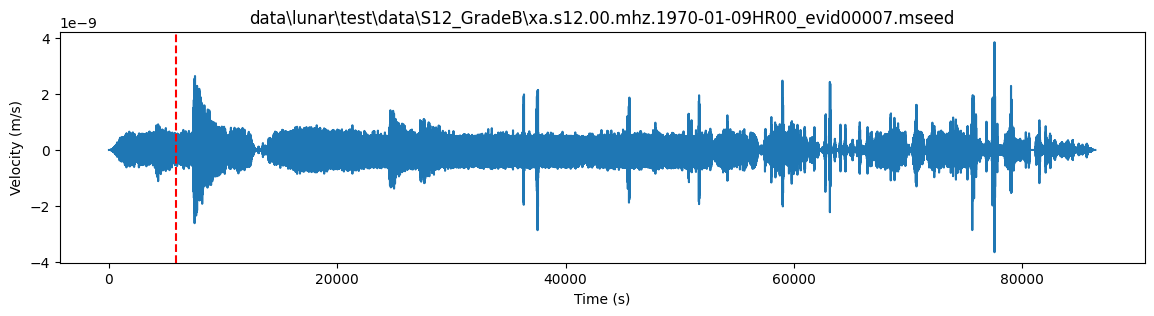

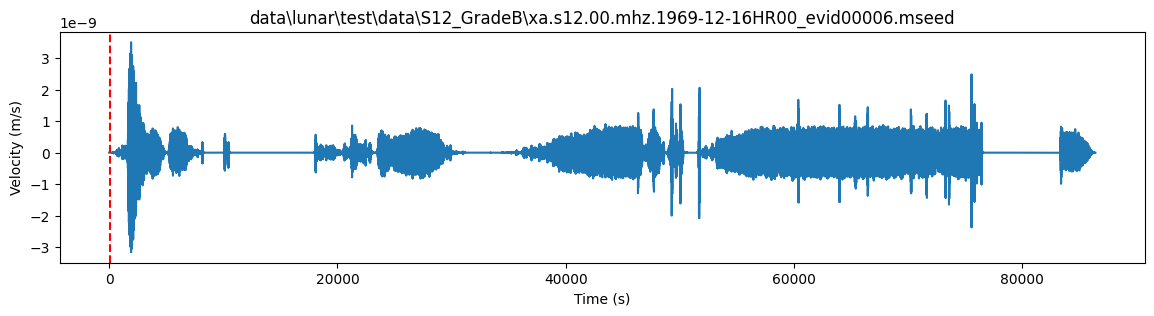

In [14]:
predicted_catalog = pd.read_csv('lunar_predictions\catalog.csv')
data_folder = r'data\lunar\test\data'

def plot_results(num):
    filename = predicted_catalog.at[num, 'filename']
    full_path = None
    for folders in ['S12_GradeB', 'S15_GradeA', 'S15_GradeB', 'S16_GradeA', 'S16_GradeB']:
        full_path = os.path.join(data_folder, folders, filename+'.mseed')
        if os.path.exists(full_path):
            filename = full_path
            break
    
    arrival_time = predicted_catalog.at[num, 'time_rel(sec)']
    stream = obspy.read(filename)
    data = stream[0].data
    time = stream[0].times()
    plt.figure(figsize=(14, 3))
    plt.plot(time, data)
    plt.axvline(arrival_time, color='r', linestyle='--', label='Predicted arrival time')
    plt.title(filename)
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (m/s)')
    
indexs = predicted_catalog.index[::-1]
for idx in indexs:
    plot_results(idx)